# Исследование динамики продаж компьютерных игр

**Заказчик:**  
Интернет-магазин "Стримчик"   
**Описание проекта:**  
В нашем распоряжении исторические данные (до 2016 года) из открытых источников о продажах игр, оценки пользователей и экспертов, жарны и платформы (например, Xbox или PlayStation). Необходимо выявить  определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.   
**Описание данных:**  
- **name** — название игры;
- **platform** - платформа;
- **year_of_release** - год выпуска;
- **genre** - жанр игры;
- **na_sales** - продажи в Северной Америке (миллионы долларов);
- **eu_sales** - продажи в Европе (миллионы долларов);
- **jp_sales** - продажи в Японии (миллионы долларов);
- **other_sales** - продажи в других странах (миллионы долларов);
- **critic_score** - оценка критиков (максимум 100);
- **user_score** - оценка пользователей (максимум 10);
- **rating** - рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Импорт необходимых библиотек** 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as st
import time
import warnings

warnings.filterwarnings('ignore')

# для парсинга
import requests
from bs4 import BeautifulSoup as BS
!pip install requests beautifulsoup4 lxml

Defaulting to user installation because normal site-packages is not writeable


**Функция для парсинга даты релиза игры**

In [2]:
def get_date_release(row):
    title = row['name']
    print('Название игры: ', title)
    title = (title.lower()          
             .replace(':', '')      
             .replace('.', '')
             .replace('\'', '')
             .replace('!', '')
             .replace(' ', '-')
            )
    try:
        if row['platform'] == 'GB':
            url = 'https://www.mobygames.com/game/gameboy/' + title
        elif row['platform'] == 'DS':
            url = 'https://www.mobygames.com/game/nintendo-ds/' + title
        elif row['platform'] == 'X360':
            url = 'https://www.mobygames.com/game/xbox360/' + title
        elif row['platform'] == 'GBA':
            url = 'https://www.mobygames.com/game/gameboy-advance/' + title
        elif row['platform'] == 'PS':
            url = 'https://www.mobygames.com/game/playstation/' + title
        elif row['platform'] == 'XB':
            url = 'https://www.mobygames.com/game/xbox/' + title
        elif row['platform'] == '2600':
            url = 'https://www.mobygames.com/game/atari-2600/' + title
        elif row['platform'] == 'XOne':
            url = 'https://www.mobygames.com/game/xbox-one/' + title
        elif row['platform'] == 'WiiU':
            url = 'https://www.mobygames.com/game/wii-u/' + title
        elif row['platform'] == 'GC':
            url = 'https://www.mobygames.com/game/gamecube/' + title
        elif row['platform'] == 'PSV':
            url = 'https://www.mobygames.com/game/ps-vita/' + title
        elif row['platform'] == 'SAT':
            url = 'https://www.mobygames.com/game/sega-saturn/' + title
        elif row['platform'] == 'SCD':
            url = 'https://www.mobygames.com/game/sega-cd/' + title
        elif row['platform'] == 'TG16':
            url = 'https://www.mobygames.com/game/turbo-grafx/' + title
        elif row['platform'] == 'GG':
            url = 'https://www.mobygames.com/game/game-gear/' + title
        elif row['platform'] == 'GEN':
            url = 'https://www.mobygames.com/game/genesis/' + title
        elif row['platform'] == 'DC':
            url = 'https://www.mobygames.com/game/dreamcast/' + title
        elif row['platform'] == 'WS':
            url = 'https://www.mobygames.com/game/wonderswan/' + title
        elif row['platform'] == 'NG':
            url = 'https://www.mobygames.com/game/neo-geo/' + title
        elif row['platform'] == 'GG':
            url = 'https://www.mobygames.com/game/game-gear/' + title
        elif row['platform'] == 'PCFX':
            url = 'https://www.mobygames.com/game/pc-fx/' + title           
        else:
            url = 'https://www.mobygames.com/game/' + row['platform'] + '/' + title
        response = requests.get(url)
        soup = BS(response.text, 'lxml')
        date = int(soup.find(id='coreGameRelease').find_all('div')[5].text[-4:])
        print('Название игры для поискового запроса на сайте: ', title)
        print('Ссылка на сайт с информацией по игре: ', url)
        print('Дата выхода игры: ', date)
        print('')
        return int(date) 
    except:
        return np.nan        

**Функция для парсинга рейтинга игры**

In [3]:
def get_rating(row):
    title = row['name']
    print(title)
    title = (title.lower()          
             .replace(':', '')     
             .replace('.', '')
             .replace('\'', '')
             .replace('!', '')
             .replace(' ', '-')
            )
    time.sleep(1)
    try:
        if row['platform'] == 'GB':
            url = 'https://www.mobygames.com/game/gameboy/' + title
        elif row['platform'] == 'DS':
            url = 'https://www.mobygames.com/game/nintendo-ds/' + title
        elif row['platform'] == 'X360':
            url = 'https://www.mobygames.com/game/xbox360/' + title
        elif row['platform'] == 'GBA':
            url = 'https://www.mobygames.com/game/gameboy-advance/' + title
        elif row['platform'] == 'PS':
            url = 'https://www.mobygames.com/game/playstation/' + title
        elif row['platform'] == 'XB':
            url = 'https://www.mobygames.com/game/xbox/' + title
        elif row['platform'] == '2600':
            url = 'https://www.mobygames.com/game/atari-2600/' + title
        elif row['platform'] == 'XOne':
            url = 'https://www.mobygames.com/game/xbox-one/' + title
        elif row['platform'] == 'WiiU':
            url = 'https://www.mobygames.com/game/wii-u/' + title
        elif row['platform'] == 'GC':
            url = 'https://www.mobygames.com/game/gamecube/' + title
        elif row['platform'] == 'PSV':
            url = 'https://www.mobygames.com/game/ps-vita/' + title
        elif row['platform'] == 'SAT':
            url = 'https://www.mobygames.com/game/sega-saturn/' + title
        elif row['platform'] == 'SCD':
            url = 'https://www.mobygames.com/game/sega-cd/' + title
        elif row['platform'] == 'TG16':
            url = 'https://www.mobygames.com/game/turbo-grafx/' + title
        elif row['platform'] == 'GG':
            url = 'https://www.mobygames.com/game/game-gear/' + title
        elif row['platform'] == 'GEN':
            url = 'https://www.mobygames.com/game/genesis/' + title
        elif row['platform'] == 'DC':
            url = 'https://www.mobygames.com/game/dreamcast/' + title
        elif row['platform'] == 'WS':
            url = 'https://www.mobygames.com/game/wonderswan/' + title
        elif row['platform'] == 'NG':
            url = 'https://www.mobygames.com/game/neo-geo/' + title
        elif row['platform'] == 'GG':
            url = 'https://www.mobygames.com/game/game-gear/' + title
        elif row['platform'] == 'PCFX':
            url = 'https://www.mobygames.com/game/pc-fx/' + title           
        else:
            url = 'https://www.mobygames.com/game/' + row['platform'] + '/' + title
        response = requests.get(url)
        soup = BS(response.text, 'lxml')
        rating_word = soup.find(id='coreGameGenre').find_all('div')[3].text
        if rating_word.lower() == 'early childhood':
            rating = 'EC'
        elif rating_word.lower() == 'everyone 10+':
            rating = 'E10+'
        elif rating_word.lower() == 'mature':
            rating = 'M'
        elif rating_word.lower() == 'rating pending':
            rating = 'RP'
        elif rating_word.lower() == 'everyone':
            rating = 'E'
        elif rating_word.lower() == 'teen':
            rating = 'T'
        elif rating_word.lower() == 'adults only':
            rating = 'AO'
        elif rating_word.lower() == 'kids to adults':
            rating = 'E'
        return rating
    except:
        return

**Функция для построения гистограмм**

In [4]:
def print_bar(column_to_group, func, y='name', query=None):
    if query is None:
        df_to_bar = df.groupby(column_to_group)[y]
    else:
        df_to_bar = df.query(query).groupby(column_to_group)[y]
    if func == 'count':
        df_to_bar = df_to_bar.count()
        plot = df_to_bar.plot(kind='bar', y=y, ec='black', figsize=(15,5))
        if column_to_group == 'year_of_release':
            plot.set(xlabel = 'Годы',
                    ylabel = 'Количество игр, шт.',
                    title = 'Количество выпущенных игр по годам'
                    )
        for column in plot.patches:
            height = column.get_height()
            plot.text(x=column.get_x() + (column.get_width() / 2), y=height+10, s='{:.0f}'.format(height), ha='center', fontsize=7)
    elif func == 'sum':
        df_to_bar = df_to_bar.sum().sort_values()
        plot = df_to_bar.plot(kind='barh', y=y, ec='black', figsize=(15, 10))
        if column_to_group == 'platform':
            plot.set(xlabel = 'Продажи, в млн. копий',
                    ylabel = 'Платформы',
                    title = 'Продажи игр на различных платформах'
                    )
        for row in plot.patches:
            width = row.get_width()
            plot.text(x=width + 1, y=row.get_y() + (row.get_height() / 4), s='{:.0f}'.format(width), ha='left')

**Функция для построения графика по продаже игр в разные годы на разных консолях**

In [5]:
def print_line_graph(platforms=None, query=None):
    legend = []
    if query is None:
        if platforms is not None:
            platforms = platforms
        else:
            platforms = df['platform'].unique().tolist()
    else:
        if platforms is not None:
            platforms = platforms
        else:    
            platforms = df.query(query)['platform'].unique().tolist()       
            
    for platform in platforms:
        if query is None:
            df_for_plot = df.query('platform == @platform')
        else:
            df_for_plot = df.query('platform == @platform').query(query)
        plot = df_for_plot.groupby('year_of_release')['total_sales'].sum().plot(kind='line', style='.-', figsize=(15,10))
        legend.append(platform)
        plt.legend(legend, bbox_to_anchor=(1.02, 1), loc='upper left')
        plot.set(xlabel = 'Годы',
                 ylabel = 'Продажи', 
                 title = 'Количество проданных копий игр на различных платформах, в млн.')      

## Открытие файла с данными и изучение общей информации

### Считаем данные из csv-файла в датафрейм и сохраним в переменную `df`

In [6]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('https://***/***/***.csv')

#### Выведем первые 15 строк датафрейма на экран

In [7]:
df.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Выведем основную информацию о датафрейме с помощью методов `info()` и `describe()`

#### С помощью `info()`

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**В датафрейме собрана информация по 16 715 играм.  
Всего лишь в 3 из 11 столбцов довольно много пропусков.  
Для столбцов `year_of_release` и `user_score` некорректно выбран тип данных: в первом случае `float` необходимо заменить на `int`, поскольку летоисчисление ведется в целых, а не вещественных числах, а во втором случае `object` заменим на `float`, так как пользовательские оценки - отличный критерий для принятия решения об успешности и популярности игры (в отличие от оценок ангажированных критиков), поэтому, для того, чтобы иметь возможность работать и обрабатывать эти данные, необходимо представить их в виде чисел.  
Также приведем все названия столбцов к нижнему регистру.**  

#### С помощью `describe()`

In [9]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Пока что смущает такой сильный разброс в датах релизов игр: промежуток в 36 лет выглядит не очень репрезентативным, поскольку за это время сменилось не одно поколение консолей, графика и сюжеты в играх успели совершить неимоверный скачок вперед, даже успело смениться поколение самих геймеров с их вкусовыми предпочтениями и запросами, поэтому не факт, что игра, которая была хитом в 80-х, 90-х или даже в 00-х, сейчас будет пользоваться таким же успехом.**  

**Также пока непонятны нулевые оценки игр. Разберемся с этим на предобработке.**

## Предобработка данных

### Замена названий столбцов (приведение к нижнему регистру)

In [10]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразование данных в нужные типы

In [11]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [12]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Поскольку в столбце есть пропуски, замену типа данных произведем не на `int`, а на `Int64` (позволяет заменять тип данных, когда в столбце есть пропуски). 

In [13]:
# заменяем тип данных в столбце 'year_of_release'
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [14]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце есть [аббревиатура TBD](https://mobilradio.ru/information/vocabulary/tbd.htm), которая говорит о том, что у игры еще нет рейтинга пользователей. Такое возможно, если игра еще не вышла (можно только оформить предзаказ) или у игры еще недостаточно отзывов, чтобы указывать среднюю пользовательскую оценку. Также в наше время агрегаторы оценок практинуют такую "фичу": пользователи не могут выставлять оценки в первые дни продажи игры, дабы не портить ей эти самые продажи (нет, чтобы игры кодить нормально научиться...)  
Прежде чем изменять тип данных в столбце, необходимо понять, что делать с этой аббревиатурой. Заменять на нули, среднее арифметическое или медиану по жанру или просто дублировать оценку критиков некорректно, поскольку это не будет отражать даже примерного отношения пользователей к игре: нули - вообще несправедливо; "средние" - нет корреляции между различными играми одного жанра; дублирование оценки - мнение критиков и игроков зачастую не совпадают чуть меньше, чем полностью.  
Посмотрим, как много таких строк, и есть ли в них что-то важное для дальнейшего исследования.

In [15]:
print('Строк с аббревиатурой TBD: ' + str(df[df['user_score'] == 'tbd']['user_score'].count()))
df[df['user_score'] == 'tbd'].head(25)

Строк с аббревиатурой TBD: 2424


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E


Около 15% всего датафрейма. Не хочется терять столько данных. По своей сути аббревиатура `tbd` в рамках нашего исследования равносильна отсутствию рейтинга у игры, поэтому заменим ее на `NaN`.

In [16]:
# заменим 'tbd' на NaN
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
print('Строк с аббревиатурой TBD: ' + str(df[df['user_score'] == 'tbd']['user_score'].count()))

Строк с аббревиатурой TBD: 0


In [17]:
# изменим тип данных в столбце 'user_score'
df['user_score'] = pd.to_numeric(df['user_score'])
df.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

### Обработка пропусков 

In [18]:
df.isna().sum().sort_values(ascending=True)

platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
year_of_release     269
rating             6766
critic_score       8578
user_score         9125
dtype: int64

- `name`: строк с пропуском в этом столбце мало и они не дают нам никакого представления о показателях конкретной игры (как ни странно, мы не знаем, что это за игра без названия = )), но все же эти строки имеют ценность для статистики по жанрам или годам выпуска игр, они входят в статистики продаж по регионам, поэтому, если пропущено только название, заменим пропуски значением `unknown`, иначе - удалим эти строки; 
- `genre`: пропусков всего 2, поэтому заполним их актуальными данными из интернета;
- `year_of_release`: попробуем спарсить год релиза игр с сайта-базы данных;  
<font color=blue>В процессе парсинга столкнулся с этим 👇: видимо к играм с одинаковым названием разрабы сайта просто дописывали всякие символы. Разумеется, при парсинге такое не учитывается. </font> 
![вот](http://dl4.joxi.net/drive/2023/02/01/0055/3022/3648462/62/7e1f9c0087.jpg)
- `rating`: будем парсить. Также рейтинг `K-A` попутно заменим на `E`, поскольку согласно [Википедии](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board) он был заменен;  
<font color=blue>В процессе парсинга столкнулся с тем, что практически у всех старых игр не проставлен рейтинг, поскольку организация, выдающая рейтинг, была основана лишь в 1994 году. Более ранним играм рейтинг выдавать поленились, похоже. Подход к делу 5 из 5.</font>  
- `critic_score`: данные брались с сайта [**metacritic**](https://www.metacritic.com), но сейчас проблемно зайти на него без vpn;
- `user_score`: тут проблема. Скорее всего данные также брались с metacritic, но, если критики, как правило, не возвращаются к уже оцененным играм, то рейтинг пользователей не статичная величина, и в 2023 году он совсем не такой, каким был в 2016 или раньше. Смешивать их будет не совсем правильно.

<font color=red>Если 269 значений парсились относительно быстро, то 5000+ строк парсятся по несколько часов. Кажется, эту затею придется оставить. Проверим на 1-2 строчках, что это работает, но оставим пропуски как есть.</font>

#### Столбец `name`

In [19]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Два раритета 1993 года без жанра, без оценок, с какими-то незначительными продажами. Думаю, от отсутствия этих строк датафрейм не потеряет в информативности. 

In [20]:
df = df.dropna(subset=['name'])

#### Столбец `genre`

In [21]:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Эти строки были удалены на предыдущем шаге. 

#### Столбец `year_of_release`

In [22]:
df[df['year_of_release'].isna()].tail(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16277,Homeworld Remastered Collection,PC,<NA>,Strategy,0.00,0.01,0.00,0.0,86.0,8.2,E10+
16288,Shorts,DS,<NA>,Platform,0.01,0.00,0.00,0.0,NaN,NaN,E10+
16293,AKB1/48: Idol to Guam de Koishitara...,X360,<NA>,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16329,Brothers in Arms: Furious 4,X360,<NA>,Shooter,0.01,0.00,0.00,0.0,NaN,NaN,M
16348,Agarest Senki: Re-appearance,PS3,<NA>,Role-Playing,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.0,43.0,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.0,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.0,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16522,Virtua Quest,GC,<NA>,Role-Playing,0.01,0.00,0.00,0.0,55.0,5.5,T


In [23]:
# создадим датафрейм с играми, у которых не указана дата релиза:
data_with_titles_without_release_date = df.loc[df['year_of_release'].isna()][['name', 'platform']]
data_with_titles_without_release_date

,name,platform
183,Madden NFL 2004,PS2
377,FIFA Soccer 2004,PS2
456,LEGO Batman: The Videogame,Wii
475,wwe Smackdown vs. Raw 2006,PS2
609,Space Invaders,2600
...,...,...
16373,PDC World Championship Darts 2008,PSP
16405,Freaky Flyers,GC
16448,Inversion,PC
16458,Hakuouki: Shinsengumi Kitan,PS3


In [24]:
data_with_titles_without_release_date['year_of_release'] = data_with_titles_without_release_date.apply(get_date_release, axis=1)

# это будет долго =) 

Название игры:  Madden NFL 2004
Название игры:  FIFA Soccer 2004
Название игры:  LEGO Batman: The Videogame
Название игры:  wwe Smackdown vs. Raw 2006
Название игры:  Space Invaders
Название игры:  Rock Band
Название игры:  Frogger's Adventures: Temple of the Frog
Название игры:  LEGO Indiana Jones: The Original Adventures
Название игры:  Call of Duty 3
Название игры:  Rock Band
Название игры:  Call of Duty: Black Ops
Название игры:  Rock Band
Название игры:  Triple Play 99
Название игры:  Adventure
Название игры:  LEGO Batman: The Videogame
Название игры:  Combat
Название игры:  LEGO Harry Potter: Years 5-7
Название игры:  NASCAR Thunder 2003
Название игры:  Hitman 2: Silent Assassin
Название игры:  Rock Band
Название игры:  Legacy of Kain: Soul Reaver
Название игры:  Donkey Kong Land III
Название игры:  Air-Sea Battle
Название игры:  Suikoden III
Название игры:  LEGO Harry Potter: Years 5-7
Название игры:  Wheel of Fortune
Название игры:  Yakuza 4
Название игры:  LEGO Harry Potter: Y

Название игры:  Clockwork Empires
Название игры:  B.L.U.E.: Legend of Water
Название игры:  GRID
Название игры:  NHL Hitz Pro
Название игры:  Luxor: Pharaoh's Challenge
Название игры:  Sega Rally 2006
Название игры:  Half-Minute Hero 2
Название игры:  Housekeeping
Название игры:  Major League Baseball 2K8
Название игры:  Sabre Wulf
Название игры:  Swords
Название игры:  Beyond the Labyrinth
Название игры:  Bikkuriman Daijiten
Название игры:  Majesty 2: The Fantasy Kingdom Sim
Название игры:  Fullmetal Alchemist: Brotherhood
Название игры:  Combat Elite: WWII Paratroopers
Название игры:  Samurai Spirits: Tenkaichi Kenkakuden
Название игры:  World of Tanks
Название игры:  Battle vs. Chess
Название игры:  Tom and Jerry in War of the Whiskers
Название игры:  Super Duper Sumos
Название игры:  The King of Fighters: Maximum Impact - Maniax
Название игры:  Combat Wings: The Great Battles of WWII
Название игры:  Tube Slider
Название игры:  Umineko no Naku Koro ni San: Shinjitsu to Gensou no Yas

In [25]:
data_with_titles_without_release_date[data_with_titles_without_release_date['name'] == 'LEGO Batman: The Videogame']

,name,platform,year_of_release
456,LEGO Batman: The Videogame,Wii,NaN
1538,LEGO Batman: The Videogame,PSP,NaN


In [26]:
# проверим, все ли правильно спарсилось:
# самый ранний год игры по жанрам; если он меньше, чем дата выхода игры - значит что-то пошло не так при парсинге
data_with_titles_without_release_date.groupby('platform')['year_of_release'].min() # самые ранние даты релиза по платформам, которые спарсились
                                                                                

platform
2600   NaN
3DS    NaN
DS     NaN
GB     NaN
GBA    NaN
GC     NaN
N64    NaN
PC     NaN
PS     NaN
PS2    NaN
PS3    NaN
PSP    NaN
PSV    NaN
Wii    NaN
X360   NaN
XB     NaN
Name: year_of_release, dtype: float64

Даты релиза консолей:   
`3DS` - 2011;  
`DS` - 2004;  
`GBA` - 2001;  
`PS2` - 2000.

**Заменим вручную явные несостыковки**

In [27]:
data_with_titles_without_release_date[(data_with_titles_without_release_date['platform'] == 'DS') \
                                     & (data_with_titles_without_release_date['year_of_release'] < 2004)]

,name,platform,year_of_release


In [28]:
data_with_titles_without_release_date.loc[12003, 'year_of_release'] = 2008

In [29]:
data_with_titles_without_release_date[(data_with_titles_without_release_date['platform'] == '3DS') \
                                     & (data_with_titles_without_release_date['year_of_release'] < 2011)]

,name,platform,year_of_release


In [30]:
data_with_titles_without_release_date.loc[15338, 'year_of_release'] = 2014

In [31]:
data_with_titles_without_release_date[(data_with_titles_without_release_date['platform'] == 'GBA') \
                                     & (data_with_titles_without_release_date['year_of_release'] < 2001)]

,name,platform,year_of_release


In [32]:
data_with_titles_without_release_date.loc[14210, 'year_of_release'] = 2004

In [33]:
data_with_titles_without_release_date[(data_with_titles_without_release_date['platform'] == 'PS2') \
                                     & (data_with_titles_without_release_date['year_of_release'] < 2000)]

,name,platform,year_of_release


In [34]:
data_with_titles_without_release_date.loc[2157, 'year_of_release'] = 2003
data_with_titles_without_release_date.loc[8364, 'year_of_release'] = 2002

In [35]:
# проверим одну из строк
data_with_titles_without_release_date.loc[2157]

name               Wheel of Fortune
platform                        PS2
year_of_release              2003.0
Name: 2157, dtype: object

In [36]:
data_with_titles_without_release_date[data_with_titles_without_release_date['year_of_release'].isna()]

,name,platform,year_of_release
183,Madden NFL 2004,PS2,NaN
377,FIFA Soccer 2004,PS2,NaN
456,LEGO Batman: The Videogame,Wii,NaN
475,wwe Smackdown vs. Raw 2006,PS2,NaN
609,Space Invaders,2600,NaN
...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN
16405,Freaky Flyers,GC,NaN
16448,Inversion,PC,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN


Минус 200 пропусков. В принципе из этих 69 тоже, думаю, добрая половина убирается: не парсятся тайтлы, где в начале названия есть `The` (на сайте без артикля), скорее всего я не вычистил все не буквенные символы. Но оставим как есть. Надо только прописать это в основном датафрейме.

In [37]:
df.update(data_with_titles_without_release_date)
print('Осталось пропусков в столбце "year_of_release" после парсинга: ' + str(df[df['year_of_release'].isna()]['name'].count()))

Осталось пропусков в столбце "year_of_release" после парсинга: 264


#### Столбец `rating`

In [38]:
# создадим датафрейм с играми, у которых не указан рейтинг:
data_with_titles_without_rating = df.loc[df['rating'].isna()][['name', 'platform', 'rating']]
data_with_titles_without_rating.head(10)

,name,platform,rating
1,Super Mario Bros.,NES,NaN
4,Pokemon Red/Pokemon Blue,GB,NaN
5,Tetris,GB,NaN
9,Duck Hunt,NES,NaN
10,Nintendogs,DS,NaN
12,Pokemon Gold/Pokemon Silver,GB,NaN
18,Super Mario World,SNES,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,NaN
21,Super Mario Land,GB,NaN
22,Super Mario Bros. 3,NES,NaN


In [39]:
print(get_rating(data_with_titles_without_rating.loc[10]))
print(get_rating(data_with_titles_without_rating.loc[18]))

Nintendogs
None
Super Mario World
None


Работать - работает, но парсит очень долго и у большинства игр действительно нет рейтинга даже на сайте. Видимо, рейтинг ввели позже их релиза. Заменим пропуски фразой `no rating`, а рейтинг `K-A` на `E`. 

In [40]:
# заменим пропуски 
df['rating'] = df['rating'].fillna('no rating')

In [41]:
# заменим рейтинг K-A на E
df['rating'] = df['rating'].where(~(df['rating'] == 'K-A'), 'E')

### Поиск и устранение выбросов и аномалий 

In [42]:
df['year_of_release'] = df['year_of_release'].astype("Int64") # После парсинга из-за NaN опять меняется тип столбца на float64
                                                            # вернем int64

In [43]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16449.000000,16713.000000,16713.000000,16713.000000,16713.000000,8137.000000,7590.000000
mean,2006.486169,0.263302,0.145045,0.077625,0.047343,68.967679,7.125046
std,5.875135,0.813565,0.503359,0.308871,0.186742,13.938165,1.500006
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


- `year_of_release`: в одной из игр скорее всего неправильно спарсилась дата релиза (видимо, это приставка atari 2600). Поправим.
- `na_sales`, `eu_sales`, `jp_sales`, `other_sales`: есть игры, у которых в графах продаж по регионам указаны нули. Посмотрим, есть ли строки, где во всех трех регионах нет продаж. Если такие игры найдутся, и дата релиза будет не 2016 год (учитывая, что по условию база данных на 2016 год, игры с датой релиза в 2016 году могут еще не обладать статистикой продаж на момент формирования датафрейма, в то время как по играм, вышедшим ранее уже точно должна быть такая информация), то удалим эти строки. Они малоинформативны для нас. 

#### Поиск аномалий в столбце `year_of_release`

In [44]:
df[df['year_of_release'] == 2600]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Это действительно игра на платформе Atari 2600. Почему-то парсит платформу, а не год релиза. Поменяем руками на `1982`.

In [45]:
df.loc[4132, 'year_of_release'] = 1982

# проверим
df.loc[4132]

name                  Karate
platform                2600
year_of_release         1982
genre               Fighting
na_sales                0.44
eu_sales                0.03
jp_sales                 0.0
other_sales              0.0
critic_score             NaN
user_score               NaN
rating             no rating
Name: 4132, dtype: object

#### Поиск аномалий по столбцам `na_sales`, `eu_sales`, `jp_sales`, `other_sales`

In [46]:
df[(df['na_sales'] == 0) & \
  (df['eu_sales'] == 0) & \
  (df['jp_sales'] == 0) &
  (df['other_sales'] == 0)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,NaN,NaN,no rating
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,NaN,NaN,no rating


Две игры, которые не несут никакой ценности для нас: нет ни продаж, ни оценок, ни рейтинга. Сгодятся только для подсчета количества игр, вышедших в тот или иной год на определенной платформе. Но, думаю, без 2 строк мы переживем. 

In [47]:
df.drop(labels=[16676, 16709], axis=0, inplace=True)

In [48]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16448.000000,16711.000000,16711.000000,16711.000000,16711.000000,8137.000000,7590.000000
mean,2006.484497,0.263334,0.145063,0.077634,0.047348,68.967679,7.125046
std,5.878391,0.813609,0.503386,0.308888,0.186752,13.938165,1.500006
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


Выглядит правдоподобно. В датафрейме собраны игры с 1977 года по 2016 год. Несмотря на то, что есть нули в отдельных регионах, минимальное значение по столбцу `total_sales` больше нуля (в этом можно убедиться чуть ниже 👇). Оценка критиков в диапазоне от 0 до 100, игроков - от 0 до 10.   

## Исследовательский анализ данных

### Расчет суммарных продаж во всех регионах

In [49]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no rating,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,no rating,28.31


### Сколько игр выпускалось в разные годы

Для ответа на этот вопрос построим столбчатую диаграмму с количеством релизов по годам. 

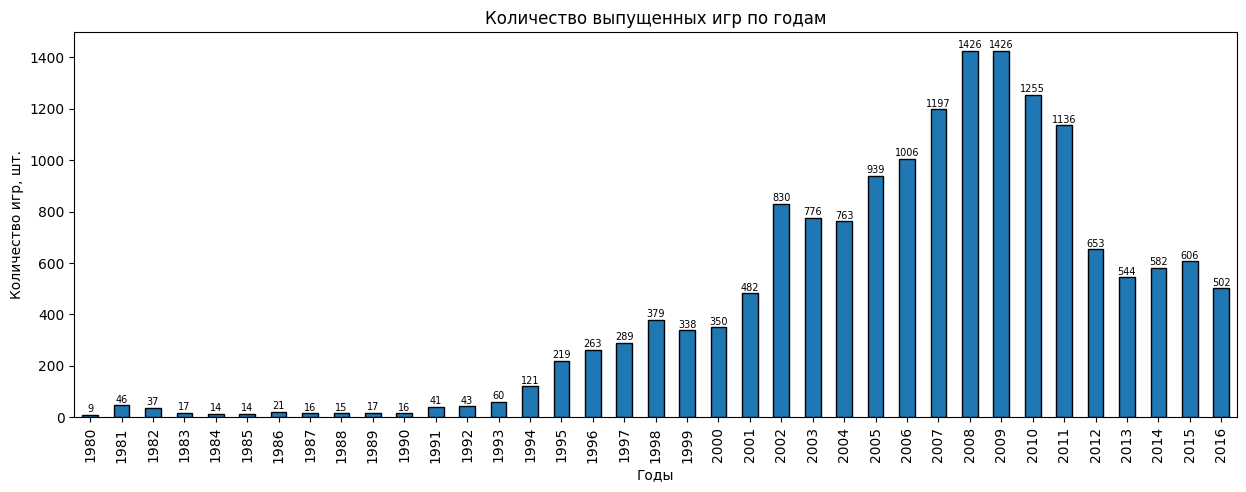

In [50]:
print_bar('year_of_release', 'count')

In [51]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Как мы видим на графике, рассвет игровой индустрии пришелся на начало 90-х годов прошлого столетия и своего пика достиг в 2008 - 2009 годах. Возможно, такой резкий скачок связан с [появлением Pentium 1](https://habr.com/ru/company/timeweb/blog/656315/) и выходом привычных нам персональных компьютеров в массы. Однако, уже к 2012 году объем игрового рынка схлопнулся в 2 раза по сравнению с пиковым 2008 (1400+ тайтлов в 2008 против ~700 в 2012). С чем связано "охлаждение" игрового рынка с начала 2010 года  сложно сказать. Учитывая, что в нашей базе данных нет мобильной платформы, возможно, с появлением первых смартфонов они стали потихоньку "отгрызать" рынок у остальных платформ. 

Учитывая, что мы собираемся делать прогноз на 2017 год, нам не нужны данные по старым платформам и играм. Практически у всех современных и актуальных консолей (платформ) существует такое понятие, как "поколение" (Nintendo консоли - аномалия от мира консолей =)). На 2016-2017 годы актуальными можно считать такие платформы, как:
- `Xbox 360`; 
- `PlayStation 3`;
- `PlayStation 2` (с натяжкой);
- `PlayStation 4`;
- `PC` (ПК-бояре всегда на коне);
- `Nintendo 3DS` (удивительно, но поддержка прекращена только в [2020](https://ru.wikipedia.org/wiki/Nintendo_3DS#:~:text=15%20%D1%84%D0%B5%D0%B2%D1%80%D0%B0%D0%BB%D1%8F%202022%20%D0%B3%D0%BE%D0%B4%D0%B0%20Nintendo,eShop%20%D0%B4%D0%BB%D1%8F%20%D1%81%D0%B5%D0%BC%D0%B5%D0%B9%D1%81%D1%82%D0%B2%D0%B0%20%D0%BA%D0%BE%D0%BD%D1%81%D0%BE%D0%BB%D0%B5%D0%B9%203DS.));
- `Xbox One`;
- `WiiU`;
- `PSV`.

Прекращена поддержка: 
- `Wii` - [20 октября 2013](https://ru.wikipedia.org/wiki/Wii);
- `NES` - [25 сентября 2003](https://ru.wikipedia.org/wiki/Nintendo_Entertainment_System#:~:text=%D0%9F%D0%BE%D1%81%D0%BB%D0%B5%201995%20%D0%B3%D0%BE%D0%B4%D0%B0%2C%20%D0%BD%D0%B0%20%D1%84%D0%BE%D0%BD%D0%B5,%D1%82%D0%B8%D1%80%D0%B0%D0%B6%D0%B0%D0%BC%D0%B8%20%D0%B4%D0%BE%20%D0%BE%D0%BA%D1%82%D1%8F%D0%B1%D1%80%D1%8F%202003%20%D0%B3%D0%BE%D0%B4%D0%B0);
- `GameBoy` - [23 марта 2003](https://ru.wikipedia.org/wiki/Game_Boy);
- `Nintendo DS` - [31 августа 2013](https://ru.wikipedia.org/wiki/Nintendo_DS);
- `SNES` - [23 мая 2005](https://ru.wikipedia.org/wiki/Super_Nintendo_Entertainment_System);
- `GameBoy Advance` - [2008](https://ru.wikipedia.org/wiki/Game_Boy_Advance);
- `Nintendo 64` - [30 апреля 2002](https://ru.wikipedia.org/wiki/Nintendo_64);
- `PlayStation` - [23 марта 2006](https://ru.wikipedia.org/wiki/PlayStation);
- `Xbox` - [2 марта 2009](https://ru.wikipedia.org/wiki/Xbox);
- `Atari 2600` - [1984](https://ru.wikipedia.org/wiki/Atari_2600);
- `PSP` - [декабрь 2014](https://ru.wikipedia.org/wiki/PlayStation_Portable);
- `GameCube` - [2007](https://ru.wikipedia.org/wiki/Nintendo_GameCube);
- `Genesis` - [1999](https://ru.wikipedia.org/wiki/Sega_Mega_Drive);
- `DreamCast` - [31 марта 2001](https://ru.wikipedia.org/wiki/Dreamcast);
- `SAT (Sega Saturn)` - [4 декабря 2000](https://ru.wikipedia.org/wiki/Sega_Saturn);
- `SCD (Sega CD)` - [1996](https://ru.wikipedia.org/wiki/Sega_Mega-CD);
- `WS (WonderSwan)` - [9 декабря 2000](https://ru.wikipedia.org/wiki/WonderSwan_Color);
- `NG (Neo-Geo)` - [август 2007](https://ru.wikipedia.org/wiki/Neo-Geo);
- `TG (TurboGrafx-16)` - [1994](https://ru.wikipedia.org/wiki/PC_Engine);
- `3DO (3DO Interactive Multiplayer)` - [1996](https://ru.wikipedia.org/wiki/3DO_Interactive_Multiplayer);
- `GG (Sega Game Gear)` - [декабрь 1996](https://ru.wikipedia.org/wiki/Sega_Game_Gear);
- `PC-FX` - [февраль 1998](https://wiki5.ru/wiki/PC-FX).

### Изменение продаж игр по платформам

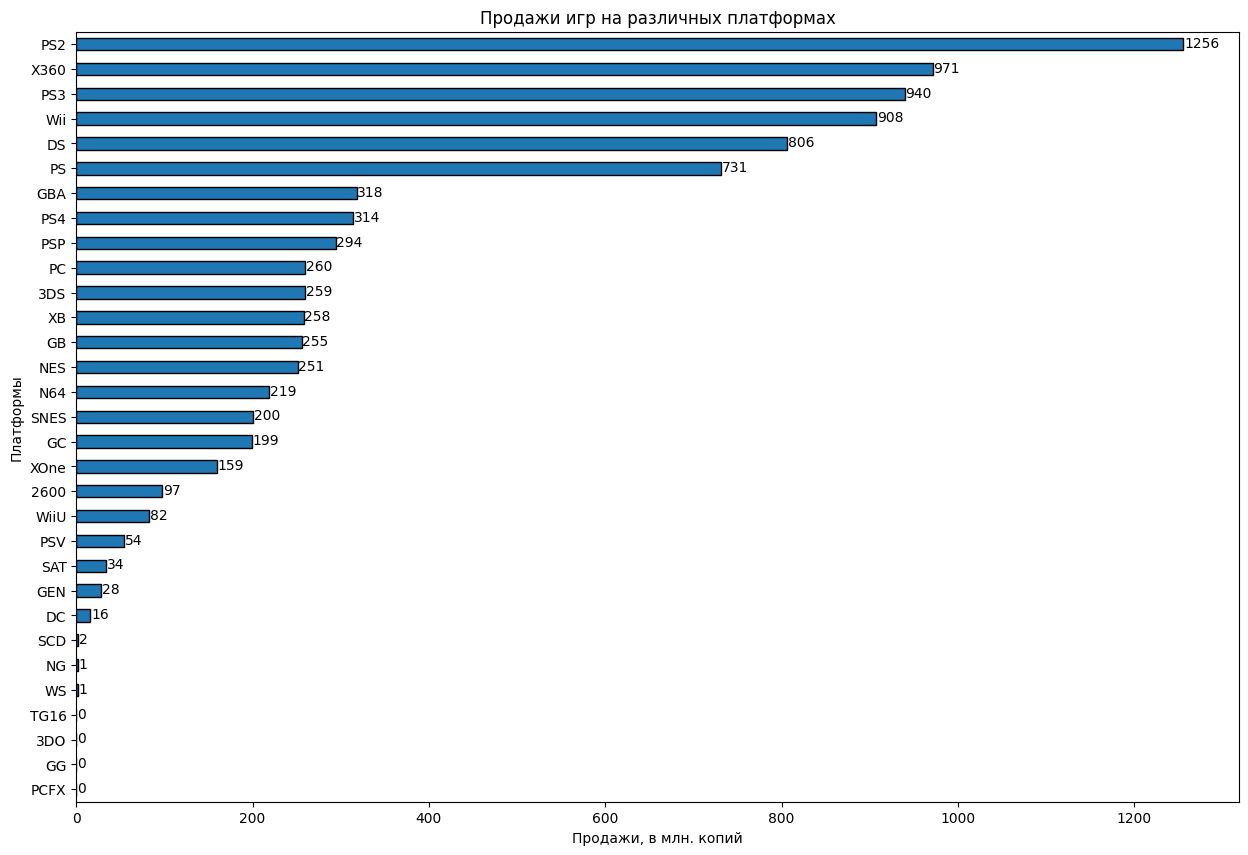

In [52]:
print_bar('platform', 'sum', 'total_sales')

Консоль PS2 появилась на прилавках магазинов 4 марта 2000 года, как раз в то самое время, когда игровая индустрия начала набирать свои обороты. Консоль практически положила начало массовым и общедоступным играм, став, наверное, самой народной консолью. Безусловно, за это время было разработано и продано больше всего игр.  
Консоли Xbox360 и PS3 появились в конце 2005 и 2006 годов, соответственно. В это время в индустрию начали поступать крупные суммы денег, люди поняли, что на игровой индустрии можно еще и зарабатывать, появились, так называемые AAA-игры, с режисурой, постановкой, масштабом, игры уже точно перестали быть гиковской темой. Не удивительно, что у этих платформ тоже одни из лучших продаж.  
Где-то особняком от всего этого стоит Nintendo со своими экспериментальными (порой даже чересчур) консолями и под стать им играми. Но азиатский рынок огромный, а Nintendo всегда была там сверх популярна. Отсюда и такие продажи на Wii, Nintendo DS.  
Интересна ситуация с PS4 (15.11.2013) и Xbox One (22.11.2013). Да, в первые годы выхода новых консолей разработчики только присматриваются и тестят новые мощности, как правило, игры выходят и не предыдущие поколения, поэтому продажи пока что (на конец 2016) довольно скромные. Но уже сейчас наглядно можно увидеть, как Microsoft проиграла конкуренцию Sony в этом поколении консолей. Причин много: и смена руководства игрового подразделения, и попытка переосмыслить консоль и сделать ее чуть ли не заменирелем ресивера цифрового телефидения, и требования по постоянному нахождению в онлайне (даже для single игр), вследствие чего невозможность перепродавать и делиться играми, отсутствие обратной совместимости и многое другое (подробнее можно почитать [тут](https://www.igromania.ru/article/31445/PS4_protiv_Xbox_One._Kak_Sony_pereigrala_Microsoft.html)).  
Также можно наблюдать провал консоли WiiU, относительно неплохие продажи для консолей PSP и PSV (как для портативных и нишевых вещей).  
Удивительны такие маленькие продажи на PC.

Проанализируем, как менялись продажи по платформам. Выберем ТОП-6 платформ (они лидируют с большим отрывом) с наибольшими суммарными продажами и построим распределение по годам, а также захватим персональные компьютеры, так как это отдельный весьма значимый пласт игр. 

In [53]:
# выделим ТОП-10 платформ по продажам
top_7 = df.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False).index.tolist()[:6]
top_7.append('PC')
top_7

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PC']

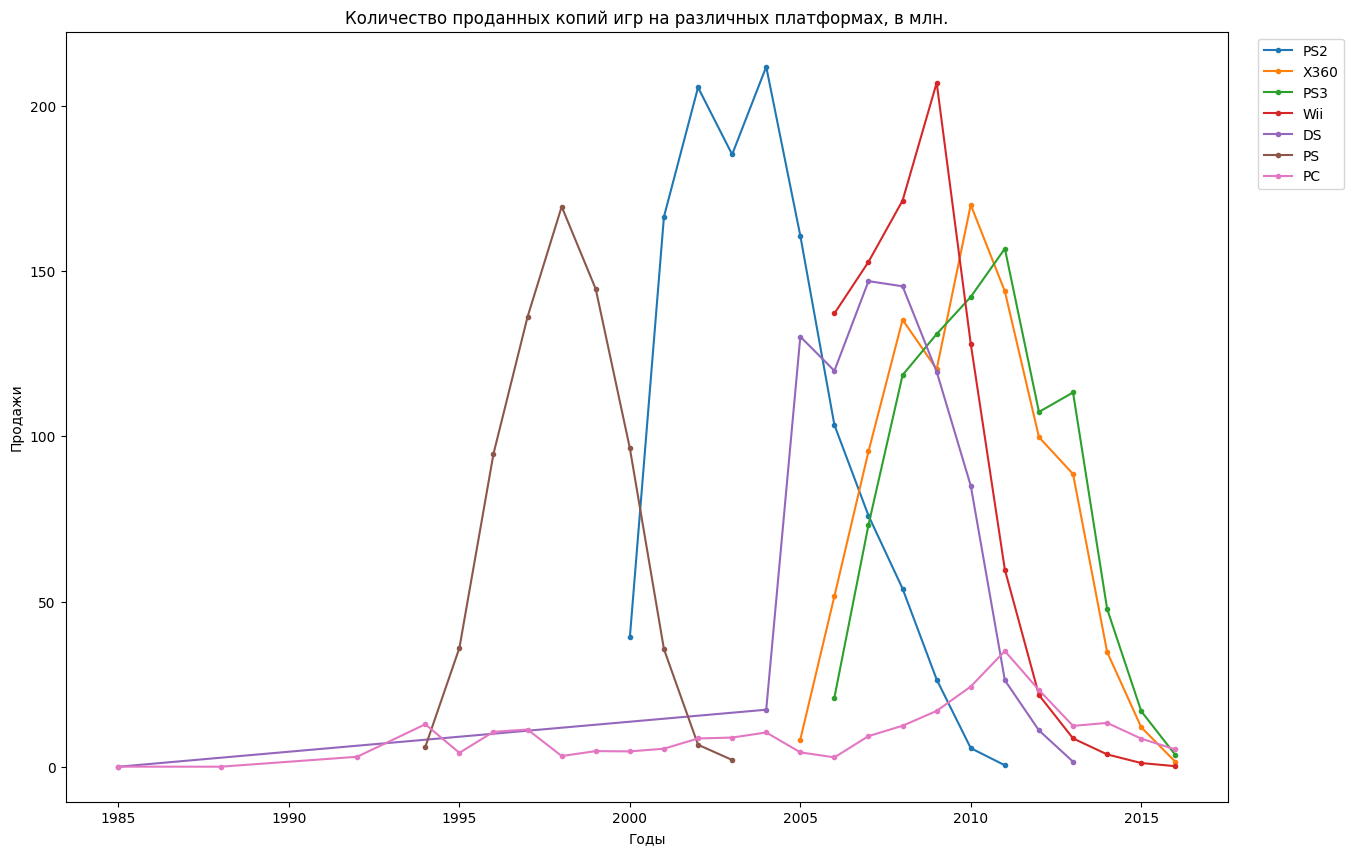

In [54]:
print_line_graph(top_7)

Как мы можем видеть по графику, средний срок жизни консоли около 10 лет:  
`PS` - с 1994 по 2003 гг (9 лет);  
`PS2` - с 2000 по 2011 гг (11 лет);  
`PS3` - с 2003 по 2016 гг (дальше просто нет данных, а так PS3 еще в определенных регионах поддерживалась до 2017 года, вроде бы);  
`X360` - с 2005 по 2016 гг (11 лет);  
`Wii` - с 2006 по 2016 гг (10 лет);  
`DS` - вышла с 1985 году, но стремительную популярность обрела в 2004 (а может быть, что-то слодалось при выгрузке данных, и у нас не совсем достоверная информация по DS), просуществовала до 2013 года;  
`PC` - вечен😎  
В общем и целом это закономерно. 10 лет - итак длительный срок для торможения развития игровой индустрии для ПК-бояр =)  

На графике также хорошо видно, как происходит смена поколений консолей. Популярность предыдущей версии потихоньку начинает падать примерно в год анонса (появления первых слухов) начала создания следующей версии.  

Как я уже отмечал выше, для построения прогноза на 2017 год нам не нужно исследовать не актуальные платформы. Наиболее репрезентабельная выборка получится по консолям, которые либо недавно вышли и в ближайшие годы только будут набирать геймерскую базу и популярность, либо консоли "в самом расвете сил", которые еще останутся актуальными в ближайшие пару лет. Думаю, оптимально актуальным периодом считать с 2014 по 2016 годы. Однако, как сказано в исходных данных проекта, информация за 2016 год может быть не полной. Учитывая этот факт, где это будет важно, будем исключать 2016 год из "актуального периода", поскольку в датафрейме может быть статистика как по всему 2016 году, так и только по первому его месяцу, что может в дальнейшем исказить выводы.   

### Платформы - лидеры по продажам

Для того, чтобы выбрать потенциально прибыльные платформы, найдем ТОП-5 по продажам за выбранный актуальный период 2014-2015 гг. 

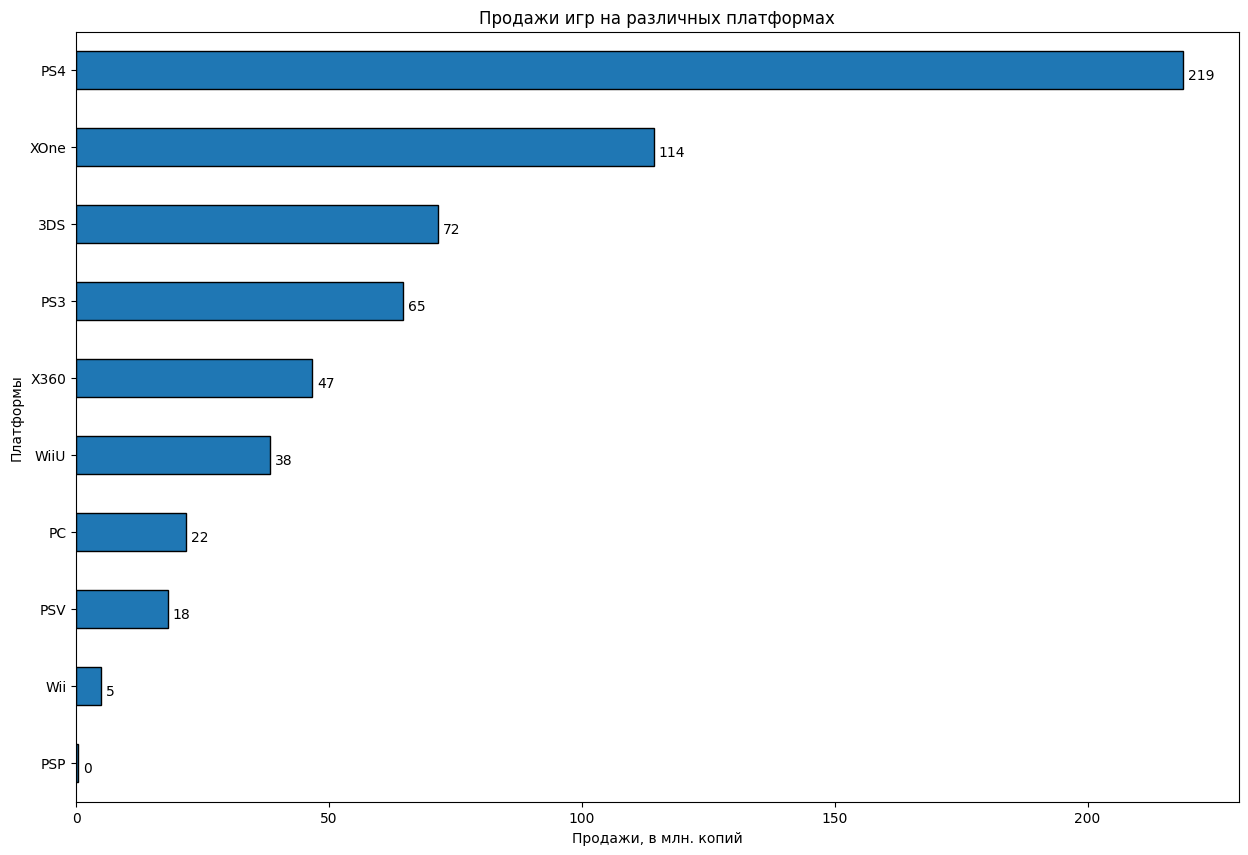

In [56]:
print_bar('platform', 'sum', 'total_sales', query='year_of_release >= 2014 and year_of_release < 2016')

In [57]:
top_5_by_total_sales_2014_2015 = ['PS4', 'XOne', '3DS', 'PS3', 'X360']

Также, чтобы понять, какую платформу можно считать потенциально прибыльной посмотрим на ее жизненный цикл, может случиться так, что продаж на платформе много, но пик давно пройден и консоль на закате своего жизненного цикла. 

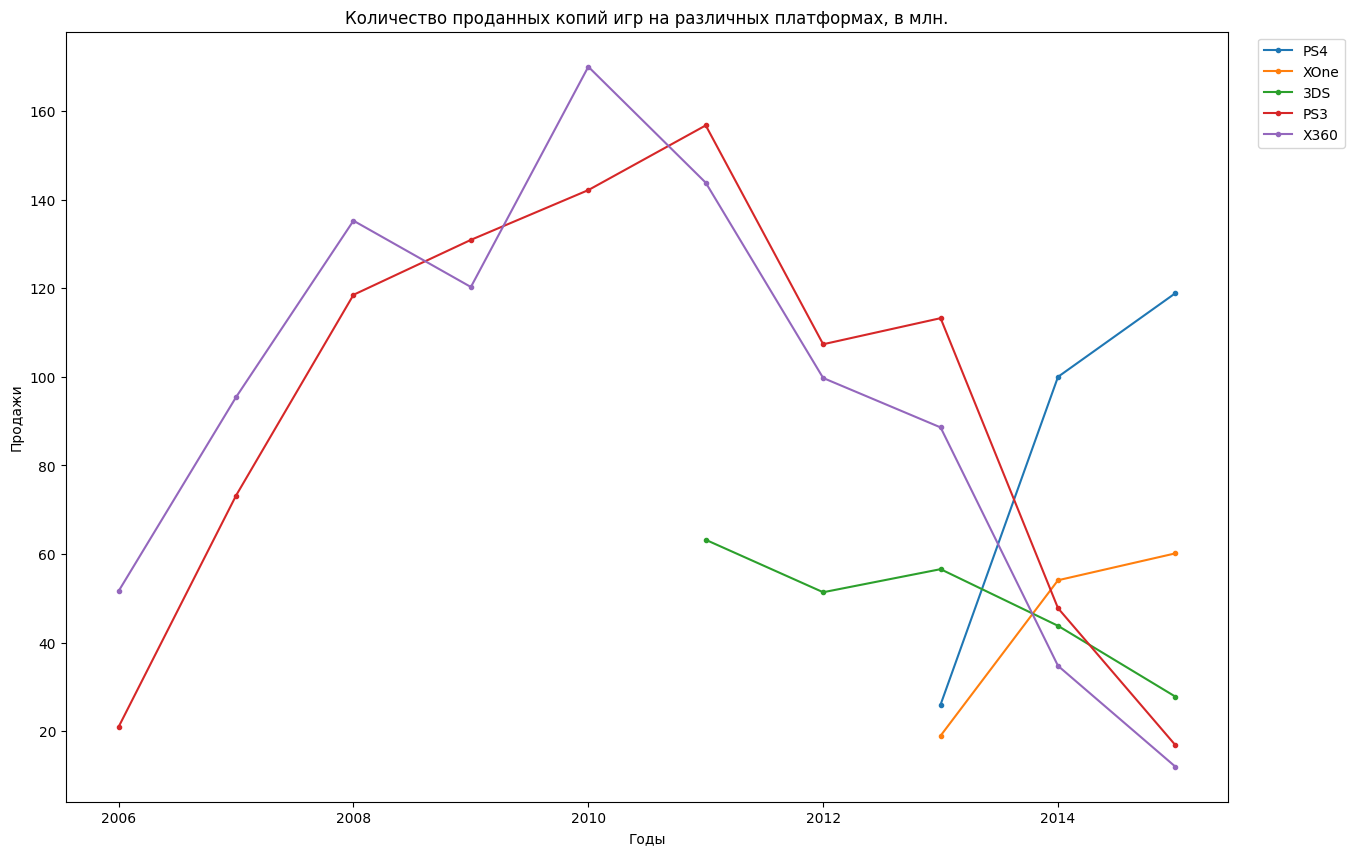

In [58]:
print_line_graph(top_5_by_total_sales_2014_2015, 'year_of_release >= 2006 and year_of_release < 2016')

Как мы можем видеть, в последние два года (2014-2015) лидируют по продажам консоли `PS4`, `XOne` и `3DS`. Причем консоль от Sony практически в 2 раза превосходит по продажам копий игр своих главных конкурентов - Microsoft.  
Если выделять потенциально прибыльные консоли в 2017 году, то это, безусловно `PS4`, `XOne`. С `3DS` ситуация непонятная. Исходя из имеющихся данных, на консоль с самого её выхода каждый год продавали все меньше и меньше копий игр, поэтому делать ставку и на нее рискованно. Да, продажи не так значительно проседают по сравнению с ее большими собратами, но и консоль сама по себе довольно нишевая. На `PS3` и `X360` точно не стоит делать ставку. Это консоли в конце своего жизненного цикла, причем их новые модели на рынке уже по 3 года, и вполне вероятно, что разработчики уже отказались от поддержки старых консолей, что автоматически убивает весь коммерческий интерес к ним.   

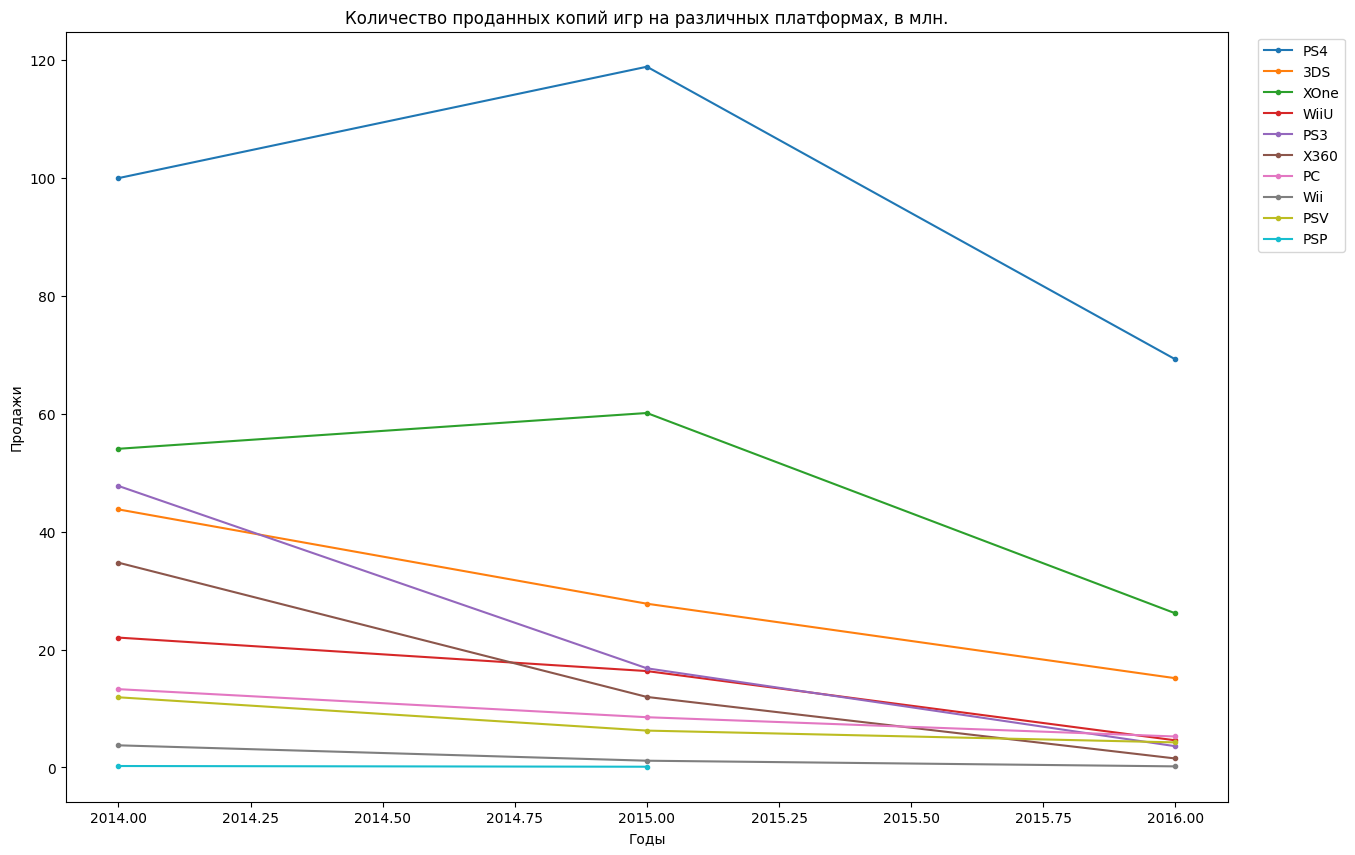

In [59]:
# актуальный период с 2016 годом; все платформы (которые дожили)
print_line_graph(query='year_of_release >= 2014 and year_of_release <= 2016')

<font color=blue>По таким данным можно сделать вывод, что в 2015 году был какой-то переломный момент, и продажи по всем платформам пошли на спад, а игровая индустрия загибается, но это же не совсем так.</font>

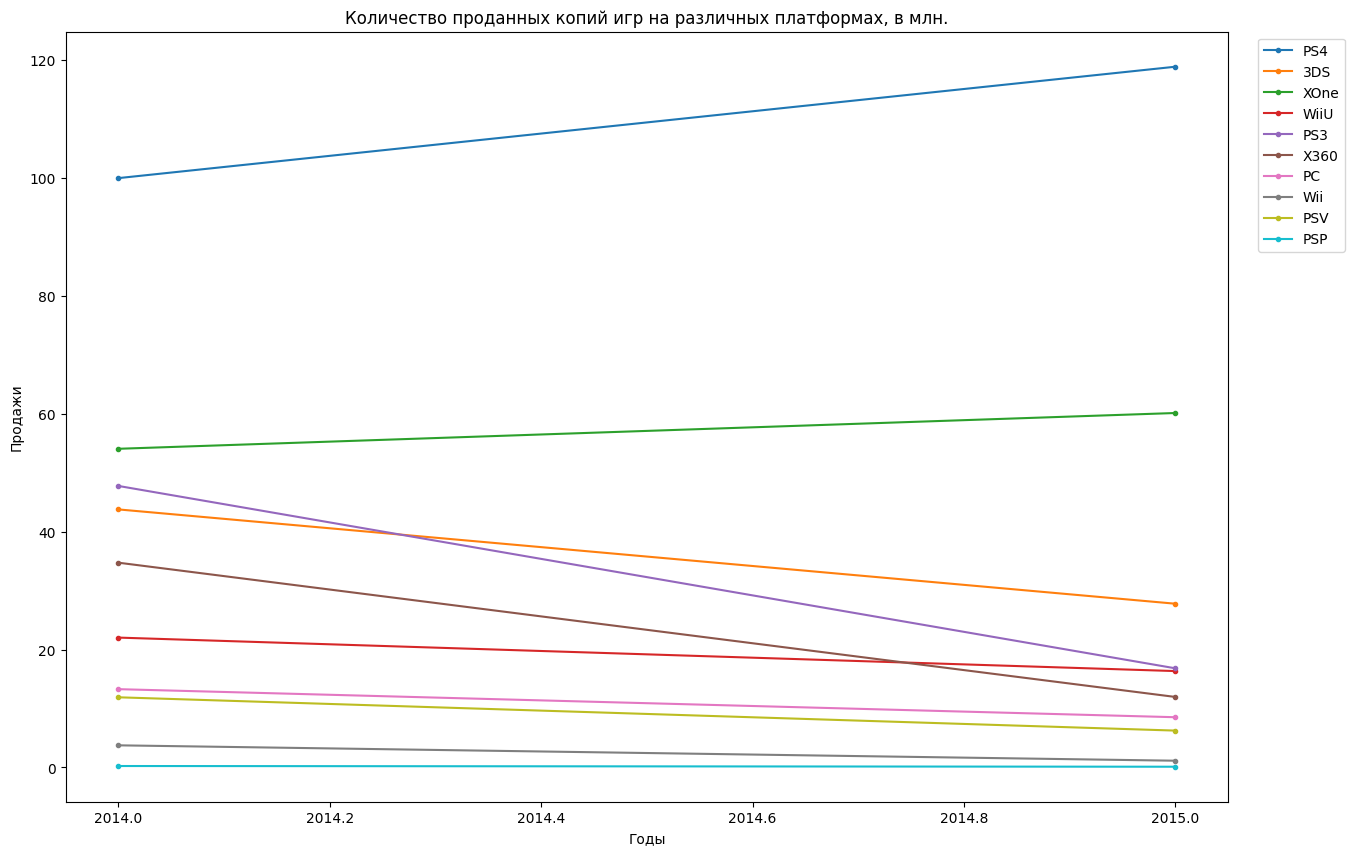

In [60]:
# актуальный период без 2016 года; все платформы (которые дожили)
print_line_graph(query='year_of_release >= 2014 and year_of_release < 2016')

<font color=blue>Без 2016 года уже более понятные данные. Растут продажи `PS4` и `XOne`. Все остальные платформы либо стагнируют, либо находятся в упадке. Но за 2 года динамика может быть обманчива.</font>

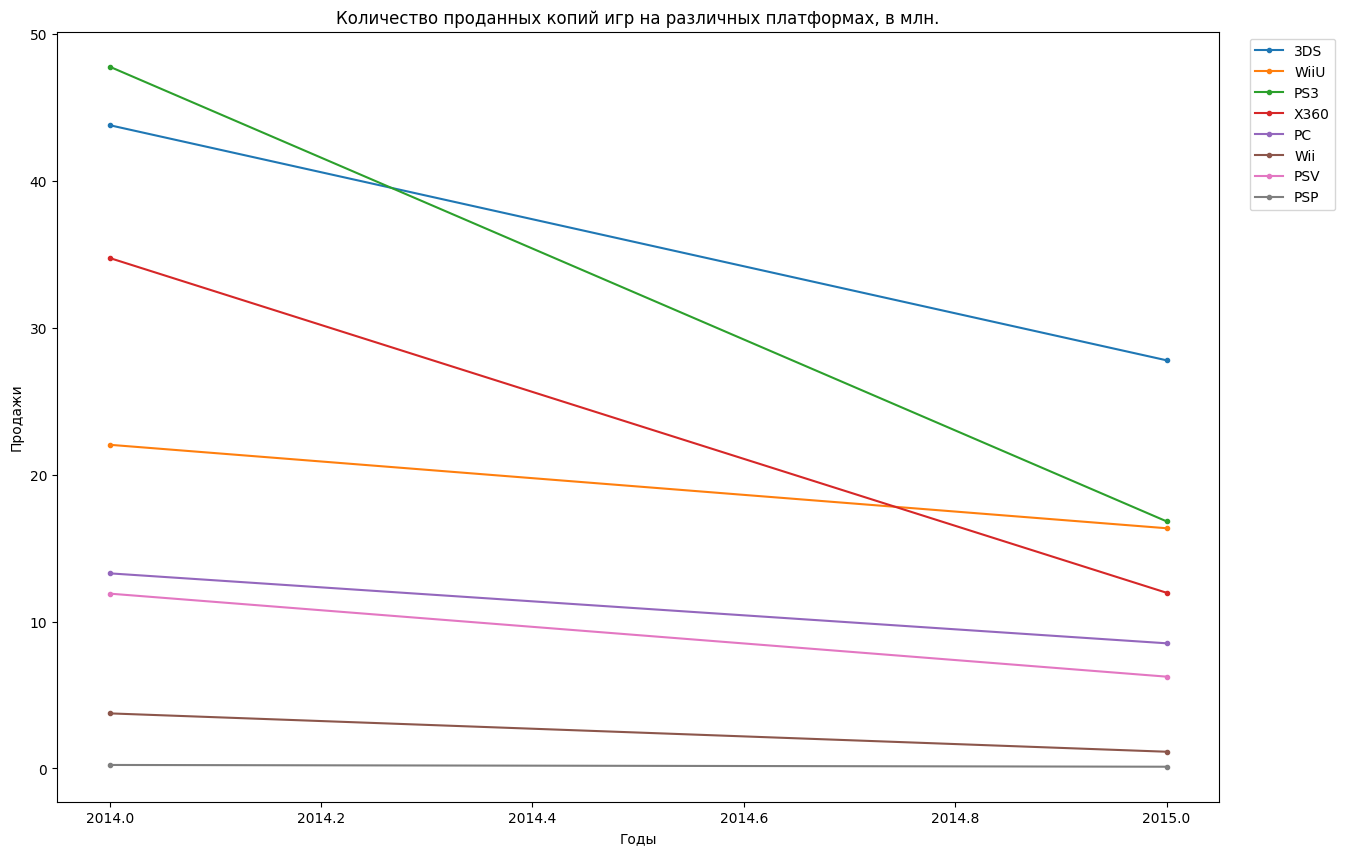

In [61]:
# актуальный период без 2016 года; все платформы (которые дожили), но без PS4 и XOne, чтобы посмотреть поближе на остальных
print_line_graph(['3DS', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV', 'PSP'], query='year_of_release >= 2014 and year_of_release < 2016')

<font color=blue>Предположение подтвердилось: либо стагнируют, либо падают.</font>

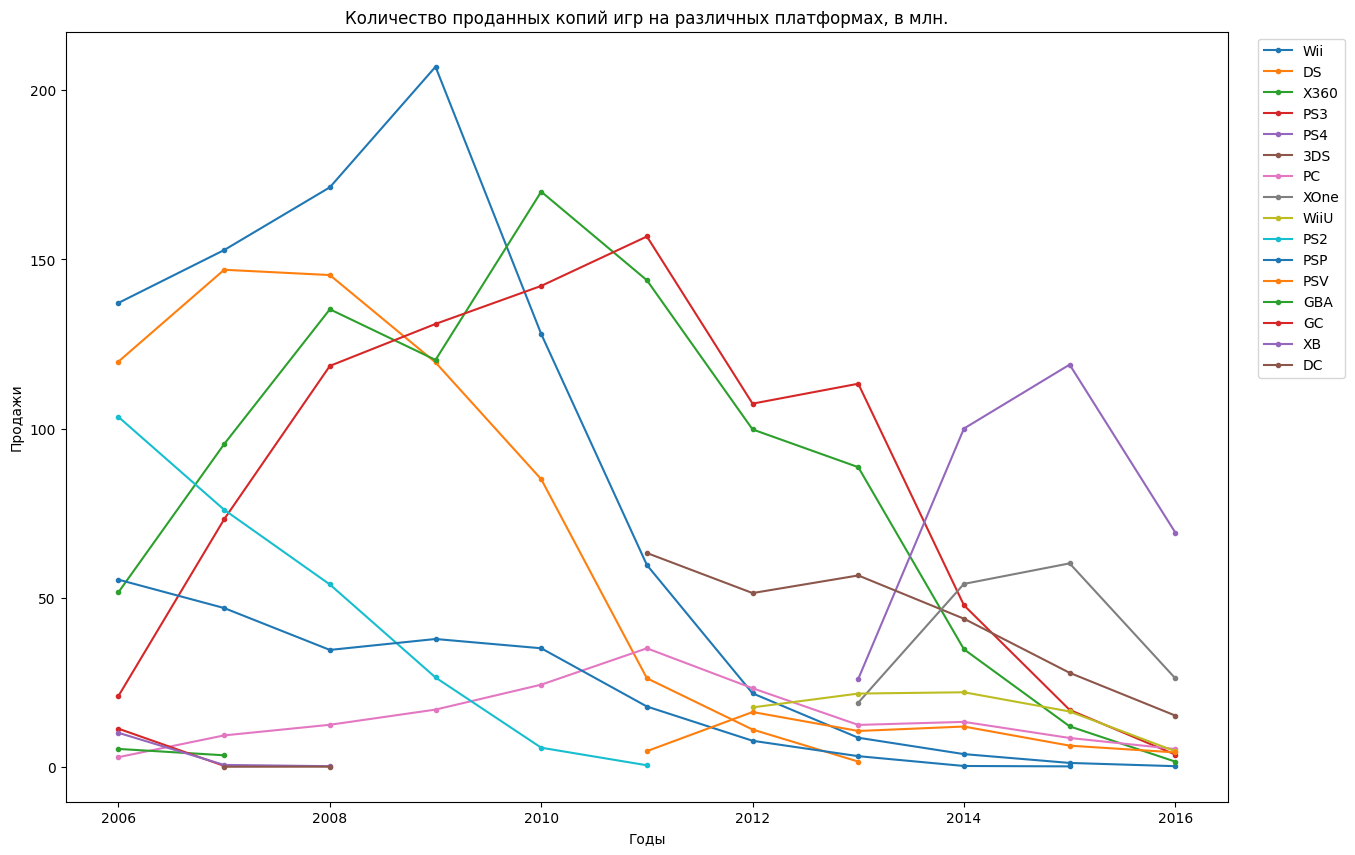

In [62]:
# последние 10 лет, с 2016 годом; все платформы
print_line_graph(query='year_of_release >= 2006 and year_of_release <= 2016')

<font color=blue> 2016 год портит картину: из-за него все платформы будто бы прошли свои пики.</font>

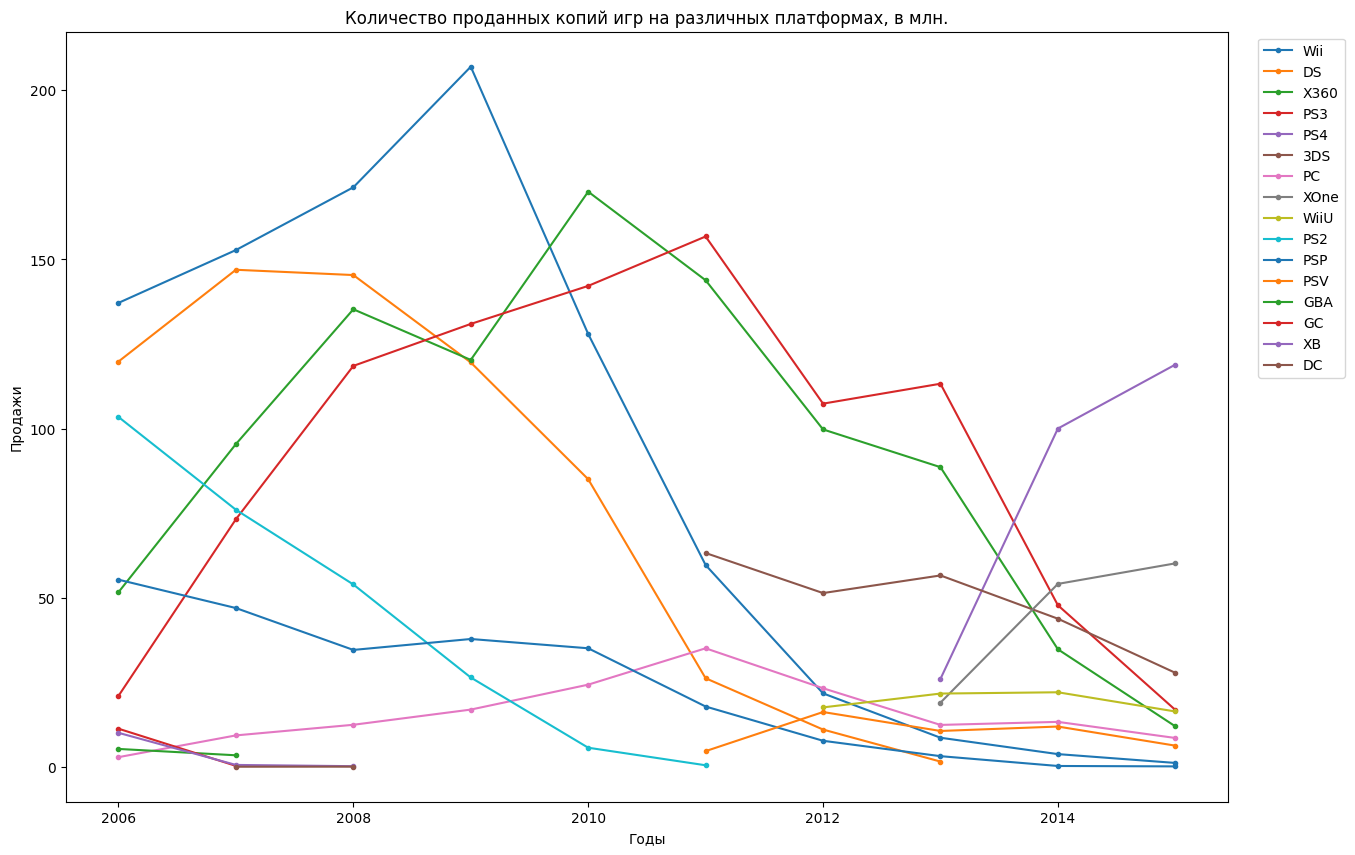

In [63]:
# последние 10 лет, без 2016 годом; все платформы
print_line_graph(query='year_of_release >= 2006 and year_of_release < 2016')

<font color=blue>Сложно, но все-таки можно разглядеть, что `PS4` и `XOne` явно набирают обороты, `PC` - своего рода плато, так же как `WiiU` и `PSV`. Остальные платформы стремительно падают.
По актуальному периоду тоже можно это понять, но тогда все-таки остается вероятность, что это временная просадка или взлет (слишком мало лет).</font>

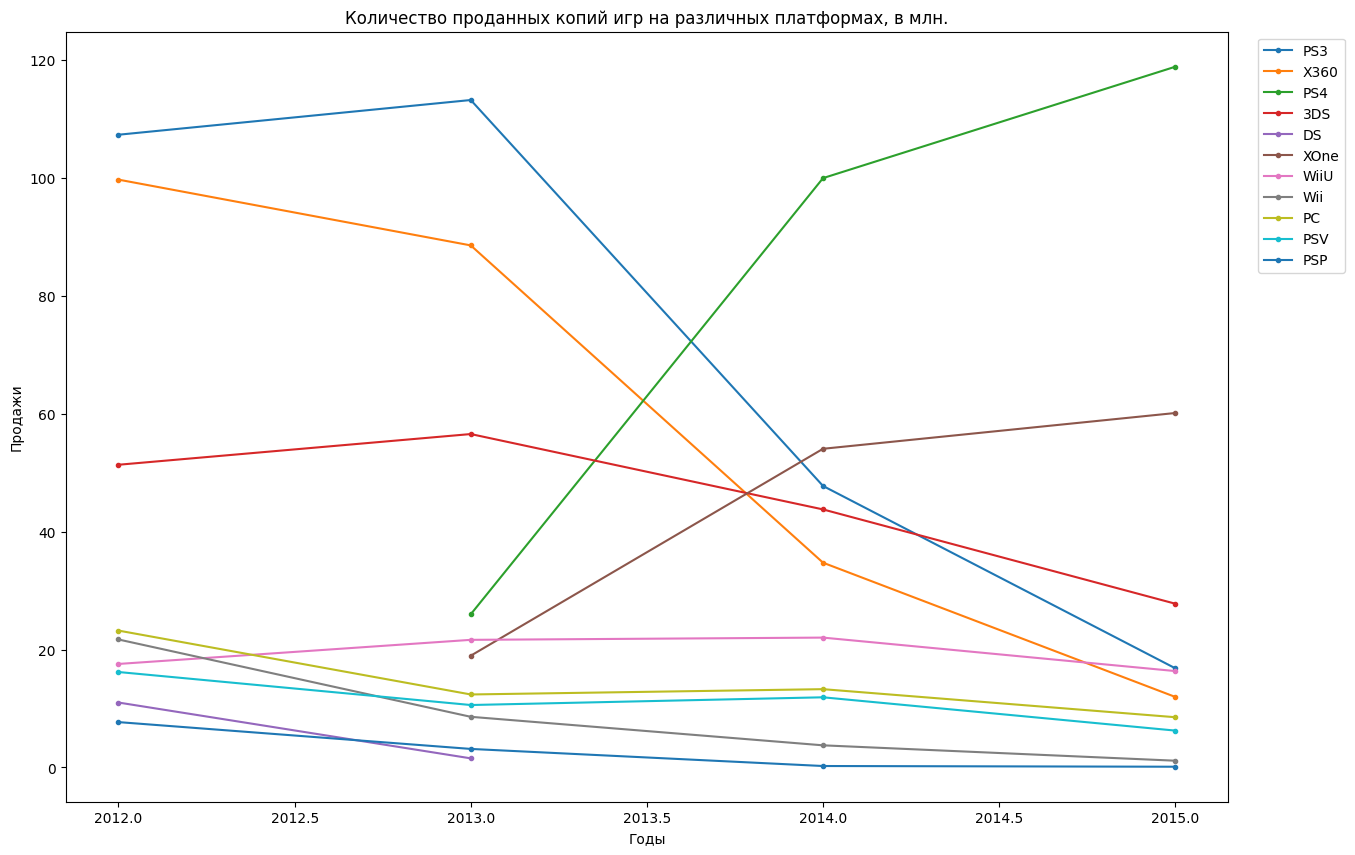

In [64]:
print_line_graph(query='year_of_release >= 2012 and year_of_release < 2016')

### График "ящик с усами" по глобальным продажам игр в разбивке по платформам

Поскольку отныне все манипуляции будут происходить с данными за актуальный период, создадим новый датафрейм.

In [65]:
df_actual_2014_2016 = df.query('year_of_release >= 2014')

In [66]:
df_actual_2014_2016.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no rating,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no rating,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no rating,7.98


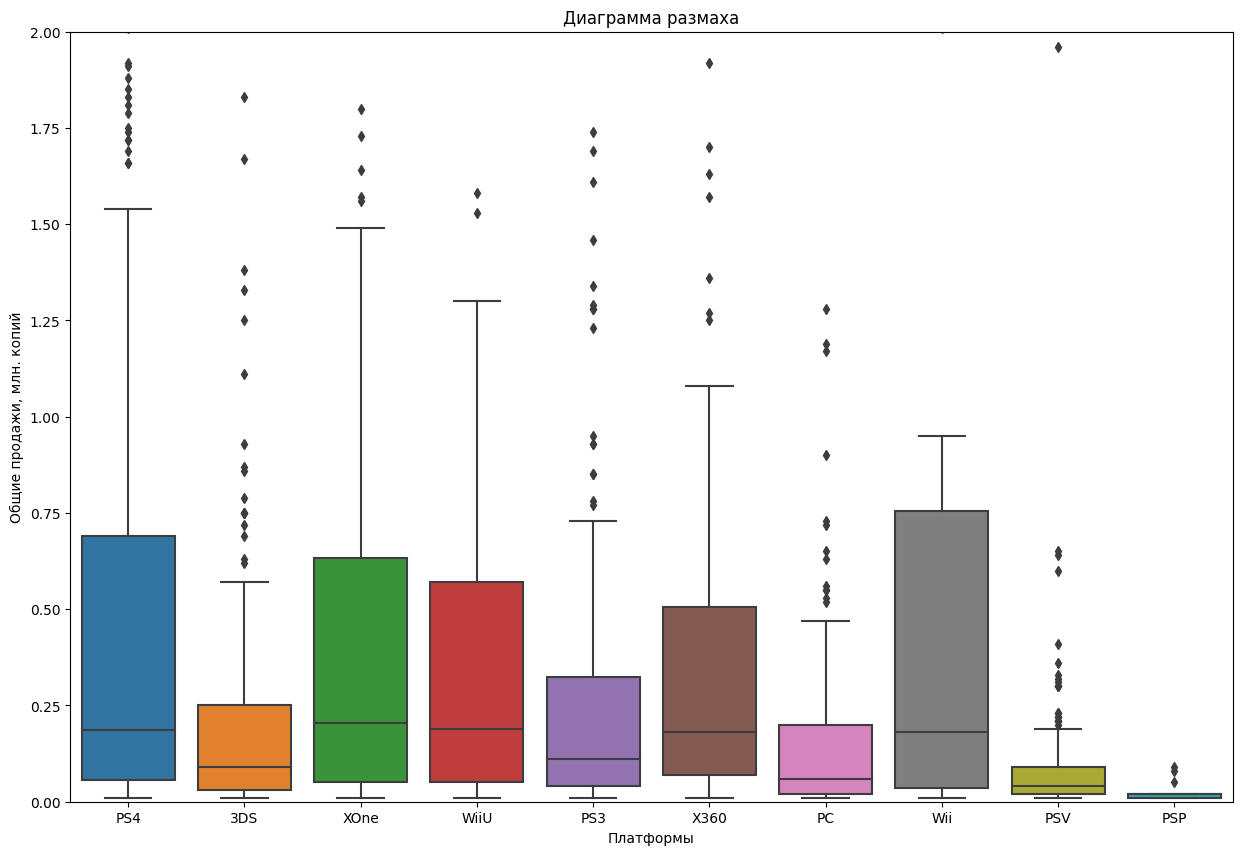

In [67]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_actual_2014_2016, x='platform', y='total_sales')
plt.ylim([0, 2])
plt.title('Диаграмма размаха')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи, млн. копий')
plt.show()

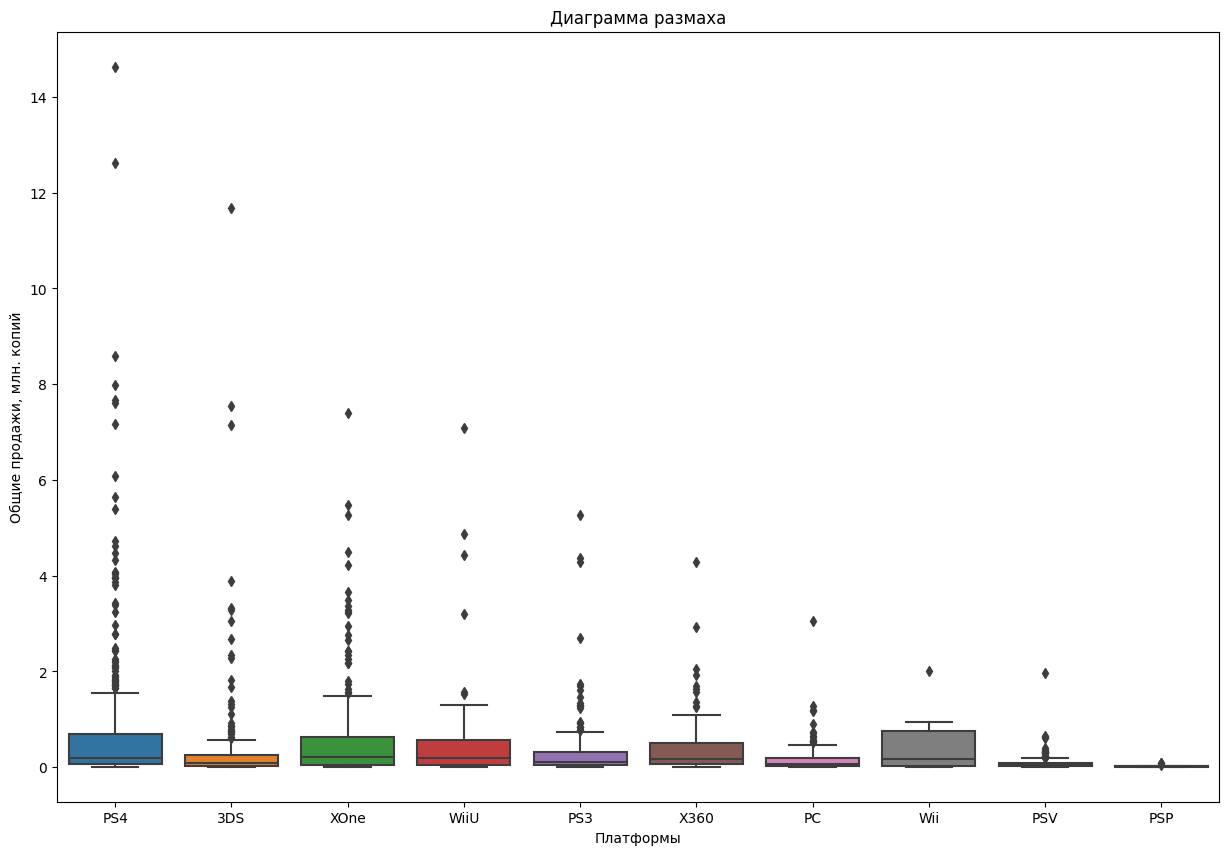

In [68]:
# для того, чтобы посмотреть на аномалии 
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_actual_2014_2016, x='platform', y='total_sales')

plt.title('Диаграмма размаха')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи, млн. копий')
plt.show()

In [69]:
df_actual_2014_2016.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,213.0,0.407042,1.185861,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


По медианным значениям общих продаж игр на платформе можно сделать предположение, чего ожидать от 2017 года. Так, у записанных нами в потенциально прибыльные консоли - `PS4` и `XOne` - медианные продажи игр примерно на одном уровне: 0,185 и 0,205 соответственно. У `3DS` и всех остальных платформ этот показатель значительно меньше, что говорит о том, что выбор сделан правильный.

### Влияние отзывов пользователей и критиков на продажи игры внутри самых популярных платформ

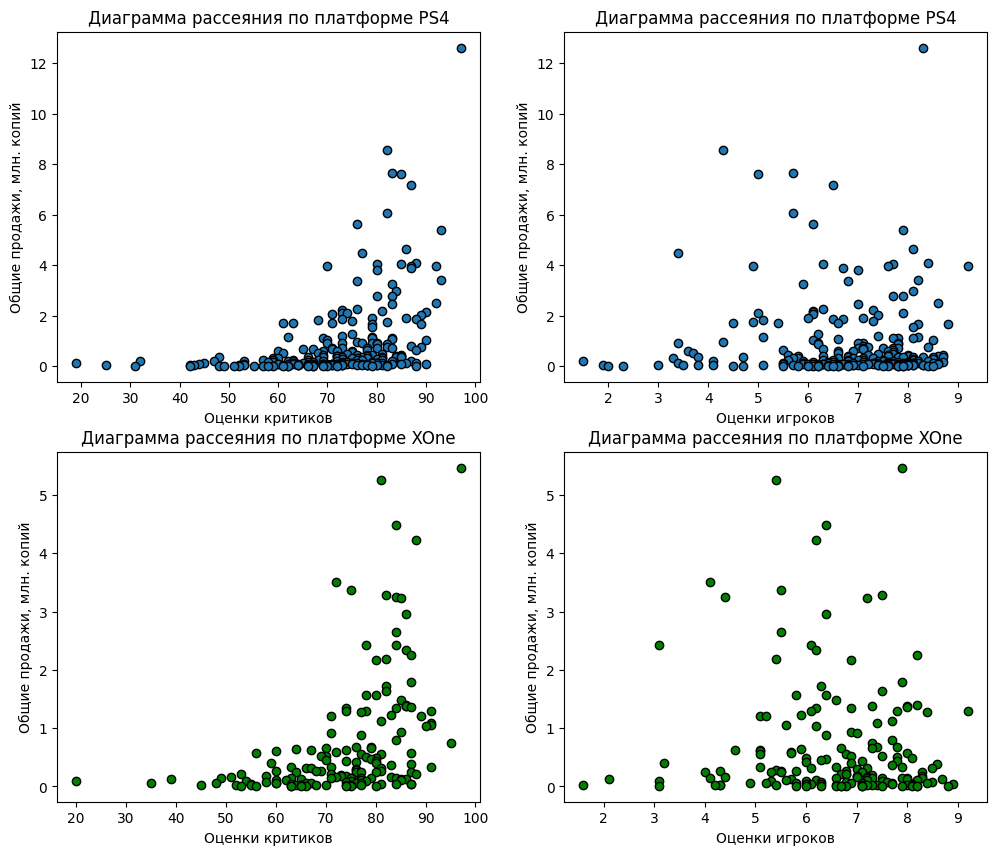

In [70]:
fig, axes = plt.subplots(2, 2)
# subplot 1
axes[0, 0].scatter(df_actual_2014_2016.query('platform == "PS4"')['critic_score'], \
                df_actual_2014_2016.query('platform == "PS4"')['total_sales'], ec='black')
axes[0, 0].set_title('Диаграмма рассеяния по платформе PS4')
axes[0, 0].set_xlabel('Оценки критиков')
axes[0, 0].set_ylabel('Общие продажи, млн. копий')

#subplot 2
axes[0, 1].scatter(df_actual_2014_2016.query('platform == "PS4"')['user_score'], \
                df_actual_2014_2016.query('platform == "PS4"')['total_sales'], ec='black')
axes[0, 1].set_title('Диаграмма рассеяния по платформе PS4')
axes[0, 1].set_xlabel('Оценки игроков')
axes[0, 1].set_ylabel('Общие продажи, млн. копий')

#subplot 3
axes[1, 0].scatter(df_actual_2014_2016.query('platform == "XOne"')['critic_score'], \
                df_actual_2014_2016.query('platform == "XOne"')['total_sales'], ec='black', color='green')
axes[1, 0].set_title('Диаграмма рассеяния по платформе XOne')
axes[1, 0].set_xlabel('Оценки критиков')
axes[1, 0].set_ylabel('Общие продажи, млн. копий')

#subplot 4
axes[1, 1].scatter(df_actual_2014_2016.query('platform == "XOne"')['user_score'], \
                df_actual_2014_2016.query('platform == "XOne"')['total_sales'], ec='black', color='green')
axes[1, 1].set_title('Диаграмма рассеяния по платформе XOne')
axes[1, 1].set_xlabel('Оценки игроков')
axes[1, 1].set_ylabel('Общие продажи, млн. копий')

fig.set_figwidth(12)
fig.set_figheight(10)

In [71]:
# по платформе PS4
print('Корреляция между отзывами критиков и продажами на платформе PS4: ' \
      + str(round(df_actual_2014_2016.query('platform == "PS4"')['critic_score'].corr(df_actual_2014_2016.query('platform == "PS4"')['total_sales']), 3)))
print('Корреляция между отзывами игроков и продажами на платформе PS4: ' \
      + str(round(df_actual_2014_2016.query('platform == "PS4"')['user_score'].corr(df_actual_2014_2016.query('platform == "PS4"')['total_sales']), 3)))

# по платформе XOne
print('Корреляция между отзывами критиков и продажами на платформе XOne: ' \
      + str(round(df_actual_2014_2016.query('platform == "XOne"')['critic_score'].corr(df_actual_2014_2016.query('platform == "XOne"')['total_sales']), 3)))
print('Корреляция между отзывами игроков и продажами на платформе XOne: ' \
      + str(round(df_actual_2014_2016.query('platform == "XOne"')['user_score'].corr(df_actual_2014_2016.query('platform == "XOne"')['total_sales']), 3)))

Корреляция между отзывами критиков и продажами на платформе PS4: 0.403
Корреляция между отзывами игроков и продажами на платформе PS4: -0.04
Корреляция между отзывами критиков и продажами на платформе XOne: 0.429
Корреляция между отзывами игроков и продажами на платформе XOne: -0.07


<font color=blue>Учитывая тот факт, что значения коэффициентов корреляции менее +0,5 или более -0,5 не считаются значимыми, можно сделать вывод, что взаимосвязи между какими-либо отзывами, будь то критики или игроки, и продажами копий игры нет.</font>

![корреляция](http://dl3.joxi.net/drive/2023/02/06/0055/3022/3648462/62/ae186afaf3.jpg)  

**Корреляция оценок критиков и игроков с продажами игр на ТОП-5 лучших платформах по продажам игр в последние годы**

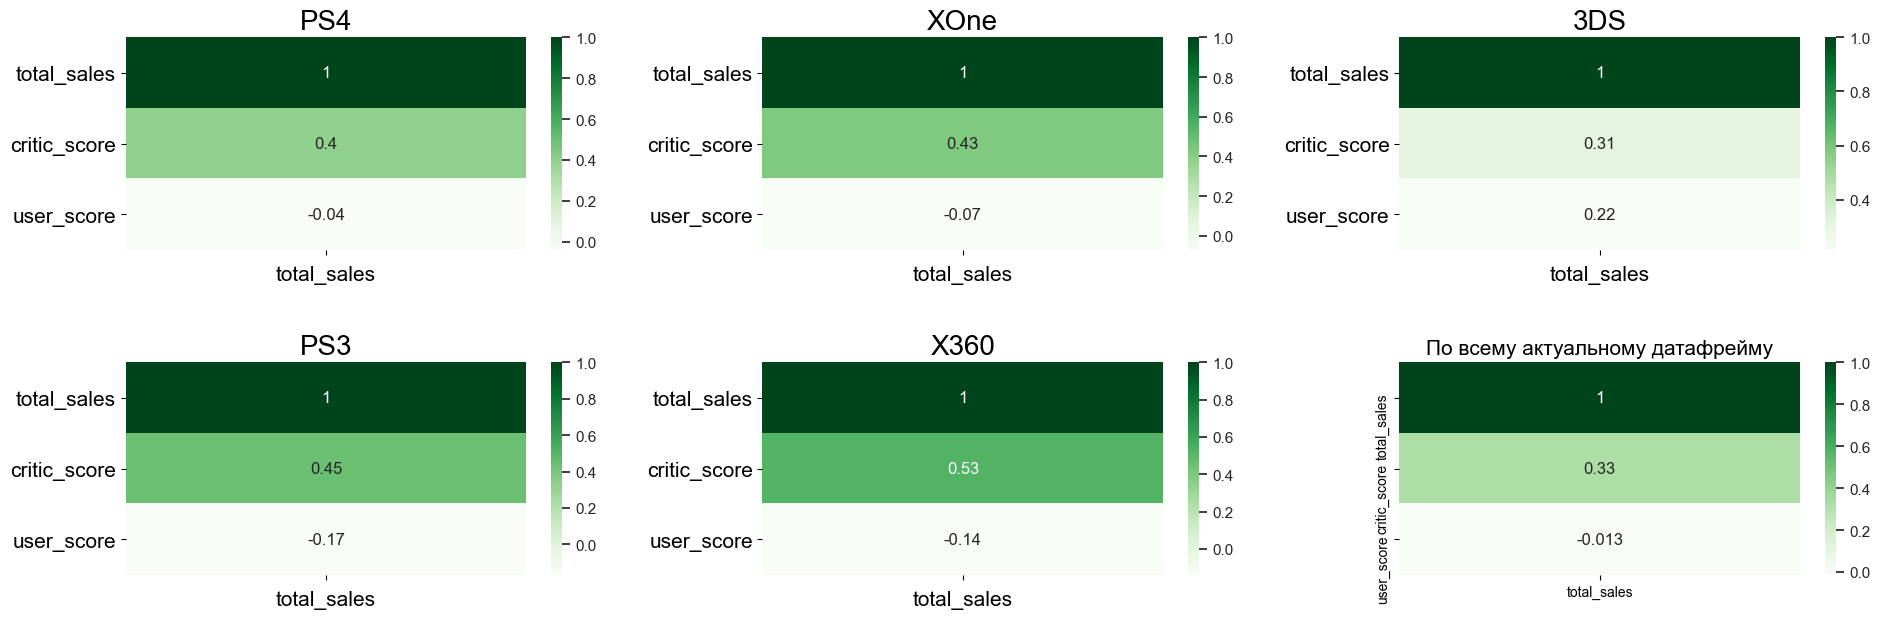

In [72]:
# платформы отсюда: top_5_by_total_sales_2014_2015
# ДФ отсюда: df_actual_2014_2016
rows = 2
columns = 3
fig, axes = plt.subplots(rows, columns, figsize=(20, 7))
count = 0
for i in range(rows):
    for j in range(columns):
        if count > len(top_5_by_total_sales_2014_2015) - 1:
            break
        else:
            platform = top_5_by_total_sales_2014_2015[count]
            df_for_heatmap = df_actual_2014_2016[df_actual_2014_2016['platform'] == platform][['total_sales', 'critic_score', 'user_score']]
            sns.set(font_scale=1.0)
            ax = sns.heatmap(df_for_heatmap.corr()[['total_sales']].sort_values(by='total_sales', ascending=False), annot=True, cmap='Greens', ax=axes[i, j])
            ax.set_title(platform, fontsize=20)
            ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=15)
            plt.tight_layout(pad=3)
            ax.set_xticklabels('')
            ax.set_xlabel('total_sales', fontsize=15)
            count += 1

ax = sns.heatmap(df_actual_2014_2016[['total_sales', 'critic_score', 'user_score']].corr()[['total_sales']].sort_values(by='total_sales', ascending=False), 
                 annot=True, cmap='Greens', ax=axes[1, 2])
ax.set_title('По всему актуальному датафрейму', fontsize=15)
plt.show()

<font color=blue>Срез по наиболее популярным платформам последних лет, а также матрица корреляции в целом по всему актуальному датафрейму подтверждают предположение, что между оценками и продажами игр корреляции нет.</font>

### Распределение игр по жанрам

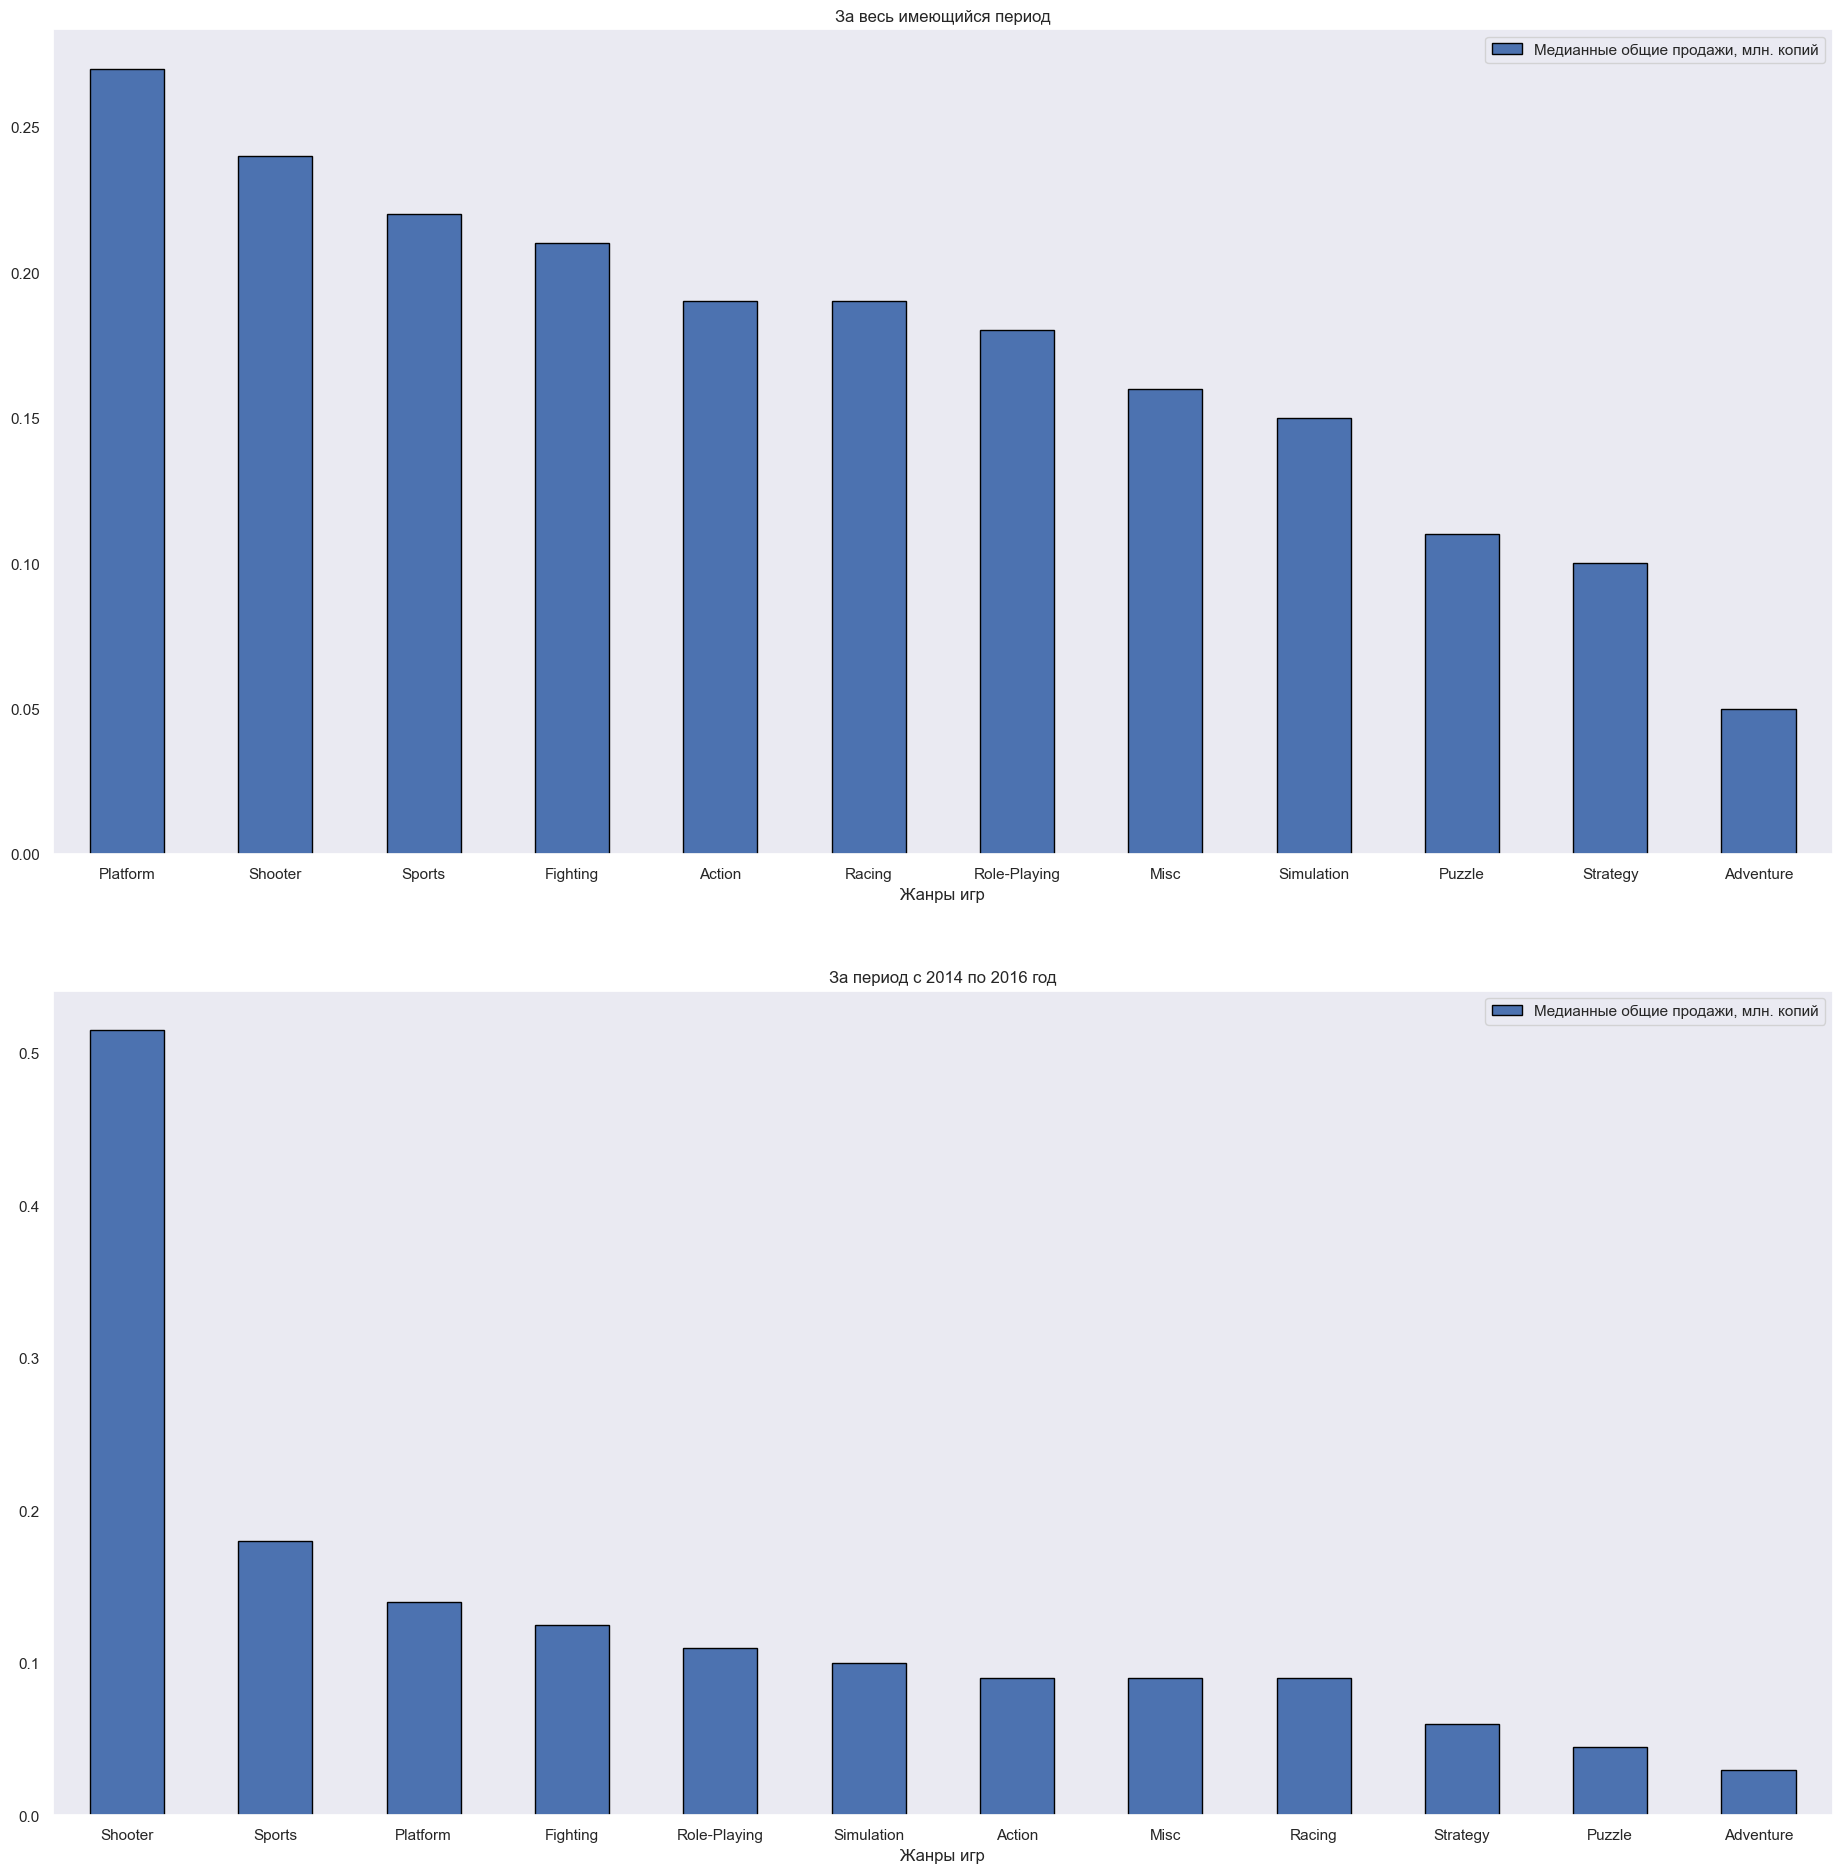

In [74]:
# по всему ДФ
pivot_by_genre_all_df_v_2 = (df.groupby('genre')
                  .agg({'total_sales': 'median'})
                  .sort_values(by='total_sales', ascending=False))

# по ДФ последних лет
pivot_by_genre_actual_df_v_2 = (df_actual_2014_2016.groupby('genre')
                  .agg({'total_sales': 'median'})
                  .sort_values(by='total_sales', ascending=False))


# построим по этим ДФ столбчатые диаграммы
# ДФ по всему периоду
fig, axes = plt.subplots(2, 1, figsize=(20, 20))
ax = pivot_by_genre_all_df_v_2.plot(kind='bar', ax=axes[0], ec='black', grid=False)
ax.set_xlabel('Жанры игр')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(['Медианные общие продажи, млн. копий'])
ax.set_title('За весь имеющийся период')
plt.tight_layout(pad=5)

# ДФ по актуальному периоду
ax = pivot_by_genre_actual_df_v_2.plot(kind='bar', ax=axes[1], ec='black', grid=False)
ax.set_xlabel('Жанры игр')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(['Медианные общие продажи, млн. копий'])
ax.set_title('За период с 2014 по 2016 год')
plt.show()

<font color=blue>Безоговорочным лидером в последние годы по количеству продаж копий игр можно считать такой жанр, как `Shooter`. Игры этого жанра, как правило, продаются полумиллионным тиражом. В пятерку также попали, хоть и с большим отставанием, - `Sports`, `Platform` (как они выжили?), `Fighting` и `Role-Playing`. Где-то в хвосте игры, у которых медитативный геймплей, которые требуют усидчивости и вдумчивости - `Strategy`, `Puzzle`. А также внезапно `Adventure`. 
На первый взгляд кажется, что, за исключением шутеров, распределение продаж довольно равномерное, и разница, например, между вторым (`Sports`) и девятым (`Racing`) местом в 90 тысяч копий выглядит незначительной. Однако, учитывая итак небольшой объем продаж игр этих жанров, это разница в 2 раза.</font> 

In [75]:
# для точности:
n_df = df_actual_2014_2016.groupby('genre')['total_sales'].median().sort_values(ascending=False)
#n_df
print('Разница в продажах спортивных и гоночных игр (в млн. копий): ' + str(n_df[1] - n_df[8]))

Разница в продажах спортивных и гоночных игр (в млн. копий): 0.09


## Портрет пользователя каждого региона

### Самые популярные платформы (ТОП-5)

<font color=red>Это бы все через функцию делать...но займусь этим после сдачи=)</font>

In [76]:
# создадим отдельный датафрейм с суммарными продажами по отдельным регионам сгруппированным по платформам  
df_actual_2014_2016_groupby_platforms = df_actual_2014_2016.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].sum()

# создадим словарь с ТОП-5 платформами каждого региона
regions_sales = ['na_sales', 'eu_sales', 'jp_sales']
dict_keys = ['na_top', 'eu_top', 'jp_top']
top_platforms_dict = {}
for i in range(0, len(regions_sales)):
    top_platforms_dict[dict_keys[i]] = df_actual_2014_2016_groupby_platforms.sort_values(by=regions_sales[i], ascending=False).index[:5].tolist()
top_platforms_dict

{'na_top': ['PS4', 'XOne', 'X360', '3DS', 'PS3'],
 'eu_top': ['PS4', 'XOne', 'PS3', 'PC', '3DS'],
 'jp_top': ['3DS', 'PS4', 'PSV', 'PS3', 'WiiU']}

In [77]:
# проведем категоризацию платформ по каждому региону
for i in df_actual_2014_2016['platform'].unique():
    if i in top_platforms_dict['na_top']:
        df_actual_2014_2016.loc[df_actual_2014_2016['platform'] == i, 'na_top_platforms'] = i
    else:
        df_actual_2014_2016.loc[df_actual_2014_2016['platform'] == i, 'na_top_platforms'] = 'Other'
    
    if i in top_platforms_dict['eu_top']:
        df_actual_2014_2016.loc[df_actual_2014_2016['platform'] == i, 'eu_top_platforms'] = i
    else:
        df_actual_2014_2016.loc[df_actual_2014_2016['platform'] == i, 'eu_top_platforms'] = 'Other'
        
    if i in top_platforms_dict['jp_top']:
        df_actual_2014_2016.loc[df_actual_2014_2016['platform'] == i, 'jp_top_platforms'] = i
    else:
        df_actual_2014_2016.loc[df_actual_2014_2016['platform'] == i, 'jp_top_platforms'] = 'Other'

In [78]:
# проверим, правильно ли получилось на XOne и WiiU
df_actual_2014_2016[(df_actual_2014_2016['platform'] == 'XOne') | (df_actual_2014_2016['platform'] == 'WiiU')].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,na_top_platforms,eu_top_platforms,jp_top_platforms
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,no rating,7.39,XOne,XOne,Other
110,Mario Kart 8,WiiU,2014,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E,7.09,Other,Other,WiiU
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47,XOne,XOne,Other
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26,XOne,XOne,Other
216,Super Smash Bros. for Wii U and 3DS,WiiU,2014,Fighting,2.60,1.08,0.81,0.38,NaN,NaN,no rating,4.87,Other,Other,WiiU


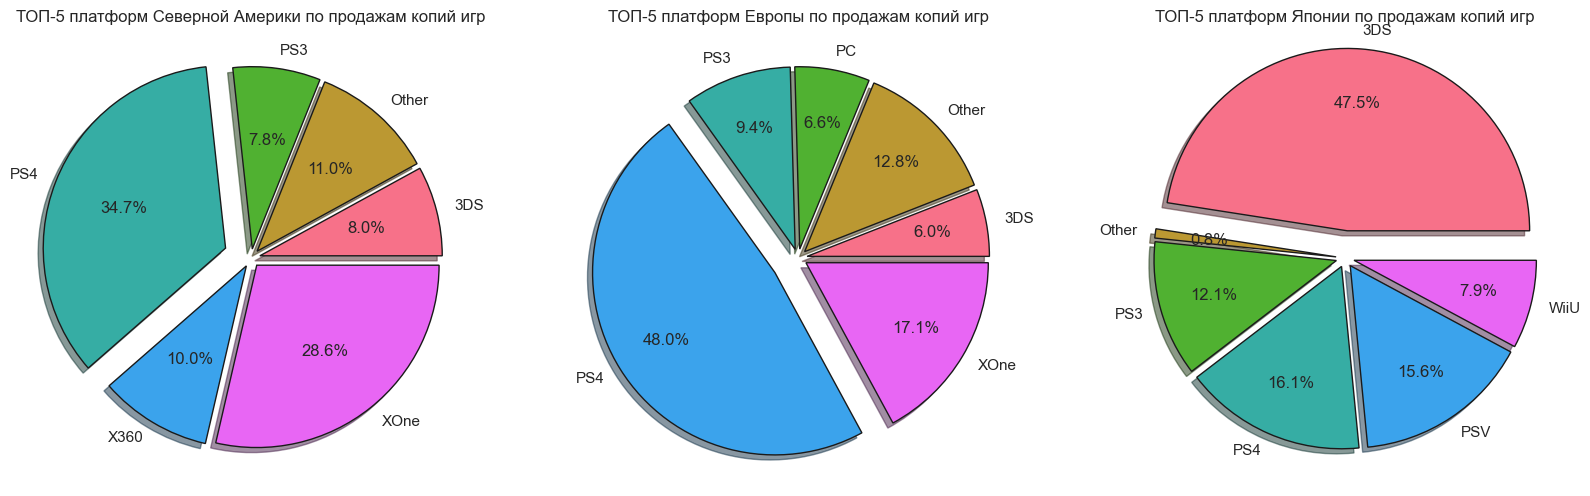

In [79]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
# subplot 1
ax = df_actual_2014_2016.groupby('na_top_platforms')['na_sales'].sum().plot(kind='pie', 
                                                                              ax=axes[0],
                                                                              colors=sns.color_palette('husl', 6),
                                                                              autopct='%.1f%%',
                                                                              shadow=True, 
                                                                              explode=(0.05, 0.05, 0.05, 0.15, 0.05, 0.05), 
                                                                              wedgeprops={'lw':1, 'ls':'-','edgecolor':"k"}, 
                                                                              rotatelabels=False)
ax.set_title('ТОП-5 платформ Северной Америки по продажам копий игр')
ax.set_ylabel('')

# subplot 2
ax = df_actual_2014_2016.groupby('eu_top_platforms')['eu_sales'].sum().plot(kind='pie', 
                                                                              ax=axes[1],
                                                                              colors=sns.color_palette('husl', 6),
                                                                              autopct='%.1f%%',
                                                                              pctdistance=0.7,
                                                                              shadow=True,
                                                                              explode=(0.05, 0.05, 0.05, 0.05, 0.15, 0.05), 
                                                                              wedgeprops={'lw':1, 'ls':'-','edgecolor':"k"}, 
                                                                              rotatelabels=False)
ax.set_title('ТОП-5 платформ Европы по продажам копий игр')
ax.set_ylabel('')

# subplot 3
ax = df_actual_2014_2016.groupby('jp_top_platforms')['jp_sales'].sum().plot(kind='pie', 
                                                                              ax=axes[2],
                                                                              colors=sns.color_palette('husl', 6),
                                                                              autopct='%.1f%%',
                                                                              pctdistance=0.7,
                                                                              shadow=True,
                                                                              explode=(0.15, 0.05, 0.05, 0.05, 0.05, 0.05), 
                                                                              wedgeprops={'lw':1, 'ls':'-','edgecolor':"k"}, 
                                                                              rotatelabels=False)
ax.set_title('ТОП-5 платформ Японии по продажам копий игр')
ax.set_ylabel('')

plt.show()

Два мастодонта игрового рынка последних лет в Северной Америке и Европе - консоли `PS4` и `XOne`. На двоих они занимают больше двух третей игрового рынка (63,3% - в Северной Америке, 65,1% - в Европе). Microsoft настолько сильно проиграла конкурентную гонку в этом поколении, что даже на внутреннем рынке не смогла занять первое место по продажам игр на свою консоль, в то время как в прошлом поколении у нее это получилось. Также стоит выделить в обоих регионах платформу `3DS`, а в Европе еще и `PC`. Они тоже входят в топ 5. Рассматривать консоли `PS3` и `X360` в планах на 2017 год нецелесообразно. Им на смену пришло новое поколение, а значит довольно быстро они уйдут в прошлое.  
Не зря азиатский рынок всегда просчитывается отдельно. Там все иначе: тотально доминируют "свои" консоли, занимая 99% рынка. При этом довольно большую часть занимают портативные консоли, такие как `3DS` и `PSV` (на двоих две трети рынка). 

### Самые популярные жанры (ТОП-5)

In [80]:
# создадим отдельный датафрейм с суммарными продажами по отдельным регионам сгруппированным по жанрам игр  
df_actual_2014_2016_groupby_genre = df_actual_2014_2016.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].sum()

# создадим словарь с ТОП-5 платформами каждого региона
regions_sales = ['na_sales', 'eu_sales', 'jp_sales']
top_genre_dict = {}
for i in range(0, len(regions_sales)):
    top_genre_dict[dict_keys[i]] = df_actual_2014_2016_groupby_genre.sort_values(by=regions_sales[i], ascending=False).index[:5].tolist()
top_genre_dict

{'na_top': ['Shooter', 'Action', 'Sports', 'Role-Playing', 'Misc'],
 'eu_top': ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing'],
 'jp_top': ['Role-Playing', 'Action', 'Fighting', 'Misc', 'Shooter']}

In [81]:
# проведем категоризацию жарнов игр по каждому региону
for i in df_actual_2014_2016['genre'].unique():
    if i in top_genre_dict['na_top']:
        df_actual_2014_2016.loc[df_actual_2014_2016['genre'] == i, 'na_top_genre'] = i
    else:
        df_actual_2014_2016.loc[df_actual_2014_2016['genre'] == i, 'na_top_genre'] = 'Other'
    
    if i in top_genre_dict['eu_top']:
        df_actual_2014_2016.loc[df_actual_2014_2016['genre'] == i, 'eu_top_genre'] = i
    else:
        df_actual_2014_2016.loc[df_actual_2014_2016['genre'] == i, 'eu_top_genre'] = 'Other'
        
    if i in top_genre_dict['jp_top']:
        df_actual_2014_2016.loc[df_actual_2014_2016['genre'] == i, 'jp_top_genre'] = i
    else:
        df_actual_2014_2016.loc[df_actual_2014_2016['genre'] == i, 'jp_top_genre'] = 'Other'

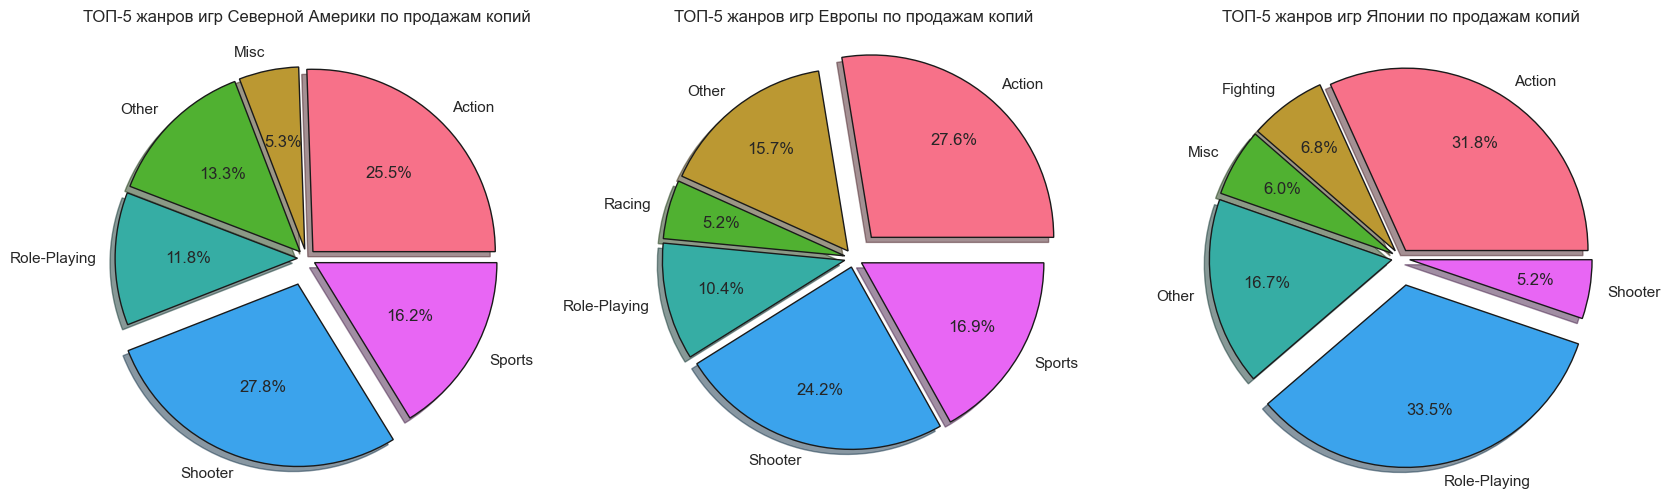

In [82]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
# subplot 1
ax = df_actual_2014_2016.groupby('na_top_genre')['na_sales'].sum().plot(kind='pie', 
                                                                              ax=axes[0],
                                                                              colors=sns.color_palette('husl', 6),
                                                                              autopct='%.1f%%',
                                                                              shadow=True, 
                                                                              explode=(0.05, 0.05, 0.05, 0.05, 0.15, 0.05), 
                                                                              wedgeprops={'lw':1, 'ls':'-','edgecolor':"k"}, 
                                                                              rotatelabels=False)
ax.set_title('ТОП-5 жанров игр Северной Америки по продажам копий')
ax.set_ylabel('')

# subplot 2
ax = df_actual_2014_2016.groupby('eu_top_genre')['eu_sales'].sum().plot(kind='pie', 
                                                                              ax=axes[1],
                                                                              colors=sns.color_palette('husl', 6),
                                                                              autopct='%.1f%%',
                                                                              pctdistance=0.7,
                                                                              shadow=True,
                                                                              explode=(0.15, 0.05, 0.05, 0.05, 0.05, 0.05), 
                                                                              wedgeprops={'lw':1, 'ls':'-','edgecolor':"k"}, 
                                                                              rotatelabels=False)
ax.set_title('ТОП-5 жанров игр Европы по продажам копий')
ax.set_ylabel('')

# subplot 3
ax = df_actual_2014_2016.groupby('jp_top_genre')['jp_sales'].sum().plot(kind='pie', 
                                                                              ax=axes[2],
                                                                              colors=sns.color_palette('husl', 6),
                                                                              autopct='%.1f%%',
                                                                              pctdistance=0.7,
                                                                              shadow=True,
                                                                              explode=(0.05, 0.05, 0.05, 0.05, 0.15, 0.05), 
                                                                              wedgeprops={'lw':1, 'ls':'-','edgecolor':"k"}, 
                                                                              rotatelabels=False)
ax.set_title('ТОП-5 жанров игр Японии по продажам копий')
ax.set_ylabel('')

plt.show()

Три самых популярных жанра игр в Северной Америке и Европе - это `Shooter`, `Action` и `Sports`. В Северной Америке немного лидирует `Shooter`, в Европе - `Action`, но в общем и целом на эти три жанра приходится практически 70% игрового рынка в обоих регионах. Далее идут ролевые игры `Role-Playing`, а замыкает 5 лидеров в Северной Америке - `Misc`, а в Европе - `Racing`. 
В Японии, конечно, все по-другому. Исторически там популярнее всего ролёвки `Role-Playing` (треть рынка), на втором месте экшен игры `Action` (другая треть), далее в порядке убывания идут `Fighting`, `Misc` и `Shooter`. 

### Влияние рейтинга ESRB на продажи в отдельном регионе

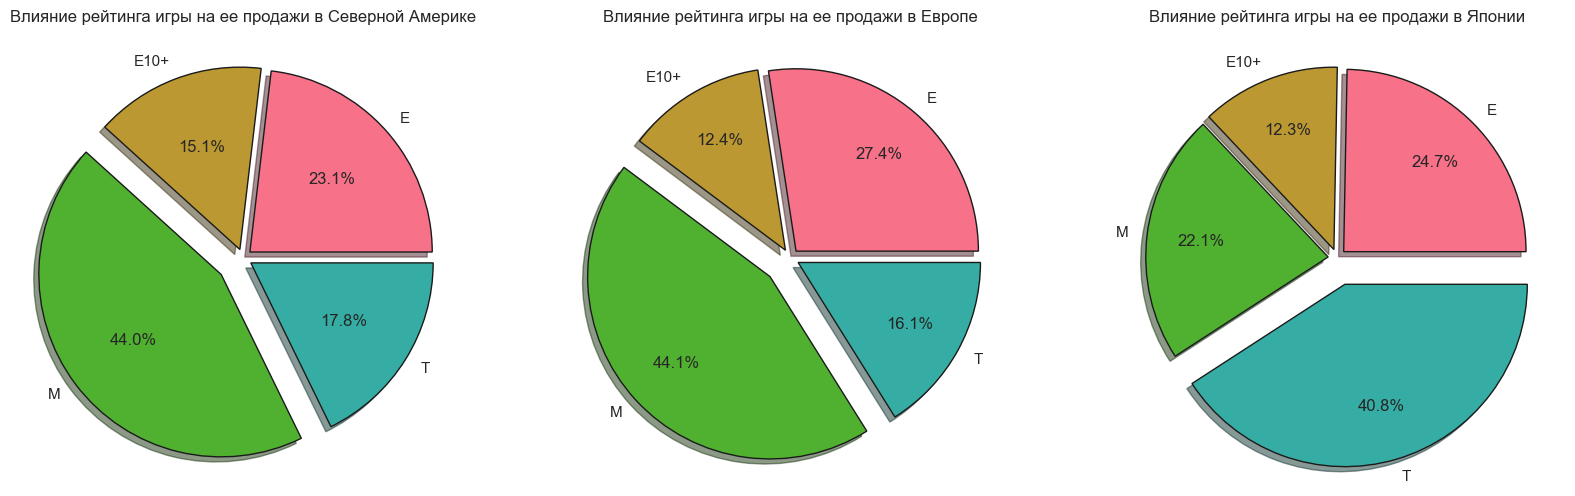

In [83]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
# subplot 1
ax = df_actual_2014_2016.query('rating != "no rating" and rating != "RP"').groupby('rating')['na_sales'].sum().plot(kind='pie', 
                                                                              ax=axes[0],
                                                                              colors=sns.color_palette('husl', 6),
                                                                              autopct='%.1f%%',
                                                                              shadow=True, 
                                                                              explode=(0.05, 0.05, 0.15, 0.05), 
                                                                              wedgeprops={'lw':1, 'ls':'-','edgecolor':"k"}, 
                                                                              rotatelabels=False)
ax.set_title('Влияние рейтинга игры на ее продажи в Северной Америке')
ax.set_ylabel('')

# subplot 2
ax = df_actual_2014_2016.query('rating != "no rating" and rating != "RP"').groupby('rating')['eu_sales'].sum().plot(kind='pie', 
                                                                              ax=axes[1],
                                                                              colors=sns.color_palette('husl', 6),
                                                                              autopct='%.1f%%',
                                                                              pctdistance=0.7,
                                                                              shadow=True,
                                                                              explode=(0.05, 0.05, 0.15, 0.05), 
                                                                              wedgeprops={'lw':1, 'ls':'-','edgecolor':"k"}, 
                                                                              rotatelabels=False)
ax.set_title('Влияние рейтинга игры на ее продажи в Европе')
ax.set_ylabel('')

# subplot 3
ax = df_actual_2014_2016.query('rating != "no rating" and rating != "RP"').groupby('rating')['jp_sales'].sum().plot(kind='pie', 
                                                                              ax=axes[2],
                                                                              colors=sns.color_palette('husl', 6),
                                                                              autopct='%.1f%%',
                                                                              pctdistance=0.7,
                                                                              shadow=True,
                                                                              explode=(0.05, 0.05, 0.05, 0.15), 
                                                                              wedgeprops={'lw':1, 'ls':'-','edgecolor':"k"}, 
                                                                              rotatelabels=False)
ax.set_title('Влияние рейтинга игры на ее продажи в Японии')
ax.set_ylabel('')

plt.show()

In [84]:
df_actual_2014_2016[df_actual_2014_2016['rating'] == 'RP']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,na_top_platforms,eu_top_platforms,jp_top_platforms,na_top_genre,eu_top_genre,jp_top_genre


Одна игра с еще не присвоенным рейтингом. Думаю, ее можно не учитывать.

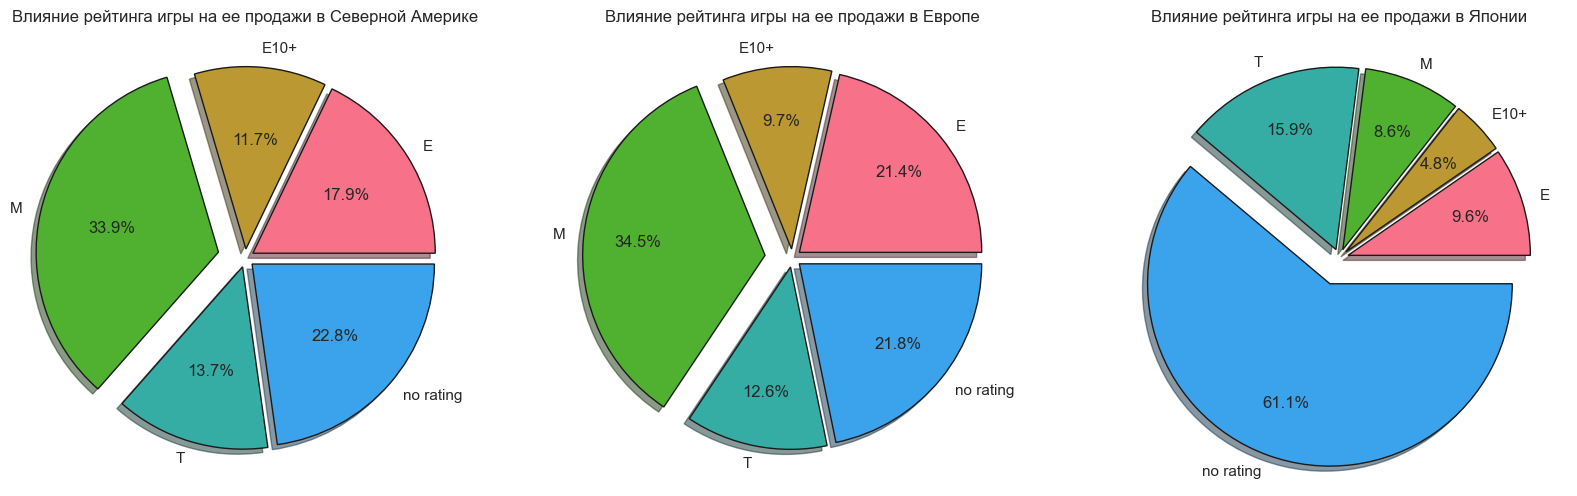

In [85]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
# subplot 1
ax = df_actual_2014_2016.query('rating != "RP"').groupby('rating')['na_sales'].sum().plot(kind='pie', 
                                                                              ax=axes[0],
                                                                              colors=sns.color_palette('husl', 6),
                                                                              autopct='%.1f%%',
                                                                              shadow=True, 
                                                                              explode=(0.05, 0.05, 0.15, 0.05, 0.05), 
                                                                              wedgeprops={'lw':1, 'ls':'-','edgecolor':"k"}, 
                                                                              rotatelabels=False)
ax.set_title('Влияние рейтинга игры на ее продажи в Северной Америке')
ax.set_ylabel('')

# subplot 2
ax = df_actual_2014_2016.query('rating != "RP"').groupby('rating')['eu_sales'].sum().plot(kind='pie', 
                                                                              ax=axes[1],
                                                                              colors=sns.color_palette('husl', 6),
                                                                              autopct='%.1f%%',
                                                                              pctdistance=0.7,
                                                                              shadow=True,
                                                                              explode=(0.05, 0.05, 0.15, 0.05, 0.05), 
                                                                              wedgeprops={'lw':1, 'ls':'-','edgecolor':"k"}, 
                                                                              rotatelabels=False)
ax.set_title('Влияние рейтинга игры на ее продажи в Европе')
ax.set_ylabel('')

# subplot 3
ax = df_actual_2014_2016.query('rating != "RP"').groupby('rating')['jp_sales'].sum().plot(kind='pie', 
                                                                              ax=axes[2],
                                                                              colors=sns.color_palette('husl', 6),
                                                                              autopct='%.1f%%',
                                                                              pctdistance=0.7,
                                                                              shadow=True,
                                                                              explode=(0.05, 0.05, 0.05, 0.05, 0.15), 
                                                                              wedgeprops={'lw':1, 'ls':'-','edgecolor':"k"}, 
                                                                              rotatelabels=False)
ax.set_title('Влияние рейтинга игры на ее продажи в Японии')
ax.set_ylabel('')

plt.show()

In [86]:
df_actual_2014_2016[df_actual_2014_2016['rating'] == 'no rating']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,na_top_platforms,eu_top_platforms,jp_top_platforms,na_top_genre,eu_top_genre,jp_top_genre
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no rating,14.63,PS4,PS4,PS4,Shooter,Shooter,Shooter
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no rating,11.68,3DS,3DS,3DS,Role-Playing,Role-Playing,Role-Playing
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no rating,7.98,PS4,PS4,PS4,Shooter,Shooter,Shooter
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,no rating,7.55,3DS,3DS,3DS,Other,Other,Fighting
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,no rating,7.39,XOne,XOne,Other,Shooter,Shooter,Shooter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01,Other,Other,PSV,Other,Other,Other
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01,Other,Other,PSV,Misc,Other,Misc
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01,PS3,PS3,PS3,Action,Action,Action
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01,Other,Other,PSV,Other,Other,Other


<font color=blue>В Северной Америке и Европе практически идентичная картина: треть рынка занимают игры с рейтингом `M`, т.е. для лиц старше 17 лет. В таких играх возможно реалистичное насилие, ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков (как сказал бы типичный стример Twitch - осуждаю!).</font>
    
<font color=blue>На втором месте в обоих регионах игры без рейтинга. Сложно сказать, с чем связано его отсутствие. Среди таких игр очень много и крупных релизов, которые не могли попасть на прилавки магазинов, не получив рейтинга (Call of Duty: Black Ops 3, Star Wars Battlefront (2015). Возможно, если игра не выходила в США или Канаде, то рейтинг ей не присваивался ([ESRB присваивает рейтинг играм только в этих странах](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board), но среди "безрейтинговых" игр есть и те, что выходили в этих странах.</font>  
    
<font color=blue>Около пятой части рынков занимают игры с рейтингом `E`, подходящие для любого возраста.</font>
    
<font color=blue>Рейтинг `T` (подходят для лиц старше 13 лет (чуть менее реалистичные сцены насилия 🤔)), а также рейтинг `E10+` (старше 10 лет) занимают примерно по 10% рынка каждый. </font>

<font color=blue>Рейтинги игр в японии расположились следующим образом:</font>  
<font color=blue>1. Игры без рейтинга - 61.2%</font>   
<font color=blue>2. `T` - 15.8%</font>  
<font color=blue>3. `E` - 9.6%</font>    
<font color=blue>4. `M` - 8.6%</font>  
<font color=blue>5. `E10+` - 4.8%</font>    

<font color=blue>Не удивительно преобладание игр без рейтинга, потому что большинство японских игр выходят только на отечественный рынок (точнее на азиатский), поэтому не получают рейтинга в США и Канаде. Остальное распределение тоже довольно понятно: на рынке Японии с огромным перевесом лидируют азиатские консоли, а игры на них, как правило, семейные с довольно детской графикой (привет техническим мощностям). </font>

## Проверка гипотез

### Проверка первой гипотезы

**Гипотеза: средние пользовательские оценки платформ `Xbox One` и `PC` одинаковые**

$H_0$ (нулевая гипотеза): средние пользовательские оценки платформ `Xbox One` и `PC` одинаковые.  
$H_1$ (альтернативная гипотеза): средние пользовательские оценки платформ `Xbox One` и `PC` отличаются.  

Для проверки гипотез воспользуемся t-критением Стьюдента, поскольку исследуемые выборки независимы.

In [87]:
# критический уровень статистической значимости = 0.05
alpha = .05

results_1 = st.ttest_ind(df_actual_2014_2016[(df_actual_2014_2016['platform'] == 'XOne') & \
                                             (df_actual_2014_2016['user_score'] >= 0)]['user_score'], 
                                  df_actual_2014_2016[(df_actual_2014_2016['platform'] == 'PC') & \
                                                      (df_actual_2014_2016['user_score'] >= 0)]['user_score'])
print('p-значение: ', results_1.pvalue)
if results_1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не можем отвергнуть нулевую гипотезу')

p-значение:  0.10450507919348415
Не можем отвергнуть нулевую гипотезу


По результатам проверки гипотез выявлено, что средние пользовательские оценки платформ `Xbox One` и `PC` одинаковые.

### Проверка второй гипотезы

**Средние пользовательские рейтинги жанров `Action` и `Sports` разные.**

$H_0$ (нулевая гипотеза): средние пользовательские оценки жанров `Action` и `Sports` одинаковые.  
$H_1$ (альтернативная гипотеза): средние пользовательские оценки жанров `Action` и `Sports` отличаются.  

Для проверки гипотез опять воспользуемся t-критением Стьюдента, поскольку исследуемые выборки независимы.

In [88]:
# критический уровень статистической значимости = 0.05
alpha = .05

results_2 = st.ttest_ind(df_actual_2014_2016[(df_actual_2014_2016['genre'] == 'Action') & \
                                             (df_actual_2014_2016['user_score'] >= 0)]['user_score'], 
                                  df_actual_2014_2016[(df_actual_2014_2016['genre'] == 'Sports') & \
                                                      (df_actual_2014_2016['user_score'] >= 0)]['user_score'])
print('p-значение: ', results_1.pvalue)
if results_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не можем отвергнуть нулевую гипотезу')

p-значение:  0.10450507919348415
Отвергаем нулевую гипотезу


По результатам проверки гипотез выявлено, что средние пользовательские оценки жанров `Action` и `Sports` разные.

## Общие выводы

По результатам исследования можно сделать следующие выводы: 
1. В последние годы объем игрового рынка сильно уменьшился (а может и данные у нас кривые) Так, например, в 2008 году вышло порядка 1450 игр, в то время, как уже в 2012 году эта цифра уменьшилась чуть больше, чем вдвое, до 500-600 тайтлов. Возможно на это дело повлияло то, что с развитием технологий и мощностей консолей, повышаются и запросы игроков в плане графики, оптимизации, сюжета, кат-сцен, продолжительности и наполненности игры, что, в свою очередь, требует от разработчиков больше времени, т.е. развитие технологий повлекло за собой увеличение цикла разработки игр. 
2. В среднем жизненный цикл игровой платформы длится около 10 лет.
3. Наиболее перспективными платформами на 2017 год являются `PS4` и `XOne`. Они в самом начале своего жизненного цикла, а значит вероятность, что появятся новые платформы, которые сместят их с лидирующих позиций, крайне мала. Можно также присмотреться к консоли `3DS` - это нишевый продукт, наиболее популярный в азиатском (Японском) регионе, но, учитывая размер этого самого азиатского региона, ставка на данную консоль не выглядит как совсем уж коммерческий провал. По аналогичным критериям можно выделить и платформы WiiU и PSV. Хоть продажи игр на эти платформы не столь высоки и находятся на плато, азиатские консоли довольно живучие, ставка в играх, выходящих на этих консолях, делается на геймплей, а не на графику (поэтому они и такие живучие), вследствие чего они могут еще долго приносить пусть и не растущий, но стабильный доход.  
4. За последние годы в лидеры по продажам копий игр выбился такой жанр, как шутеры. Далее, уже с большим отставанием, идут все остальные шанры. Наименее привлекательными в плане цифр продаж являются жанры, которые требуют большой усидчивости (Puzzle, Strategy). На удивление, популярность жанра Adventure хуже, чем всех остальных. 
5. В среднем игроки в Северной Америке и Европе не сильно отличаются по своим игровым вкусовым предпочтениям, в то время, как Японские игроки имеют совершенно иные вкусы. Поэтому для выработки стратегии на 2017 год необходимо брать во внимание и учитывать особенности двух среднестатистических игроков. Так, например, чтобы понравится "западному" игроку игра должна быть экшеном или шутером с соответствующим рейтингом (от `T` и выше) либо же спортивным симулятором. "Восточному" же геймер, помимо экшен игры, предпочитает ролевые. Не такая сильная любовь к шутерам автоматически понижает рейтинг игр до `T`. 
6. По большому проценту игр с отсутствующим рейтингом в Японии можно предположить, что любимые игры "восточного" геймера не так часто выходят за пределы азиатского рынка. Возможно издатели по каким-либо причинам просто этого не делают. Но, если такие попытки все-таки были и провалились, значит эти игры довольно специфические и не полюбились "западным" игрокам. Что тоже необходимо учитывать при разработке стратегии.